# ggplot2

In [1]:
library('ggplot2')

## 1. Point graph

### Generate a point graph from a given dataframe

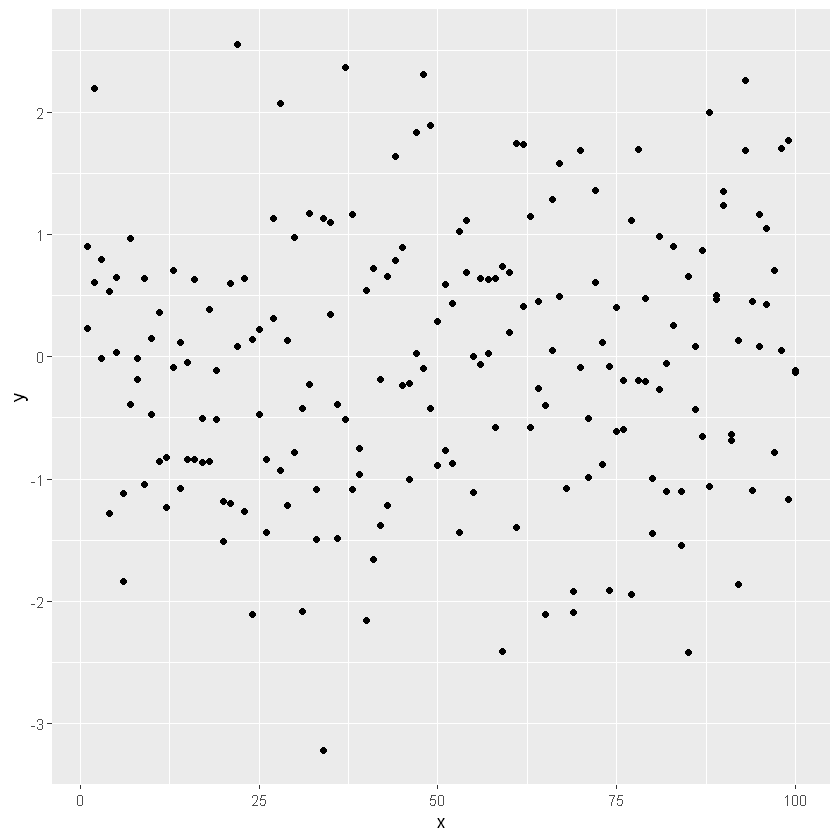

In [2]:
# Generate random values for x axis and y axis:
df = data.frame(x=1:100,y = rnorm(200,0,1))

# Define a point graph with geom_point:
(pgplot = ggplot(df) + geom_point(aes(x,y)))

### Change theme of graph with theme(), theme_bw(), theme_classic(), theme_minimal(),...

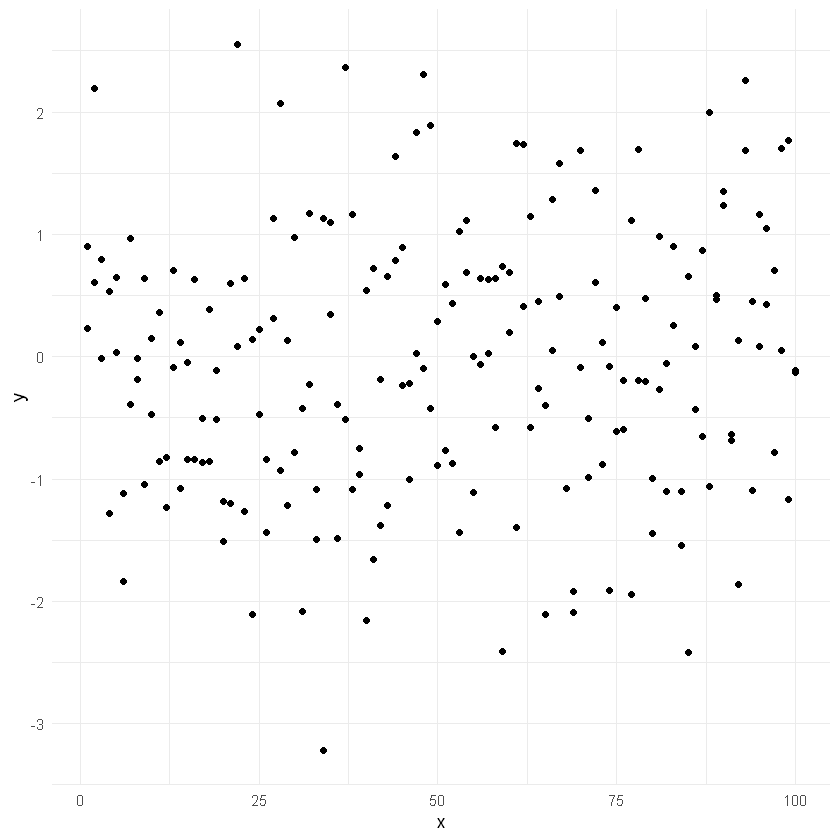

In [3]:
(pgplot = pgplot + theme_minimal())

### Add title, subtitle, x axis and y axis to graph with labs()

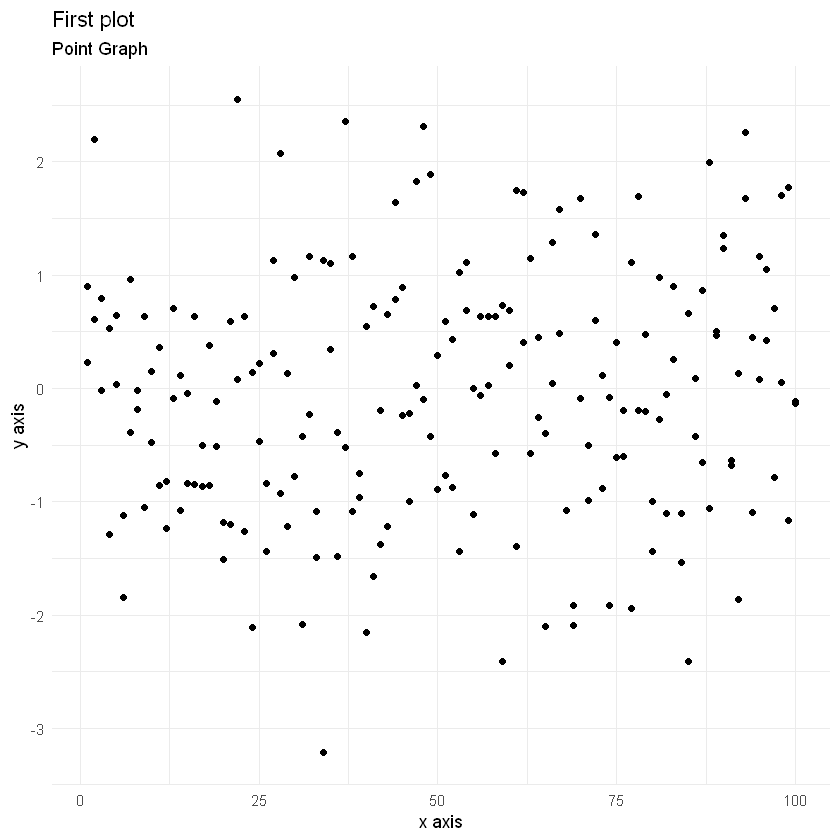

In [4]:
(pgplot = pgplot + labs(title = "First plot", subtitle = "Point Graph", x = "x axis", y = "y axis"))

### Color Scaling

In [5]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Gradient scaling

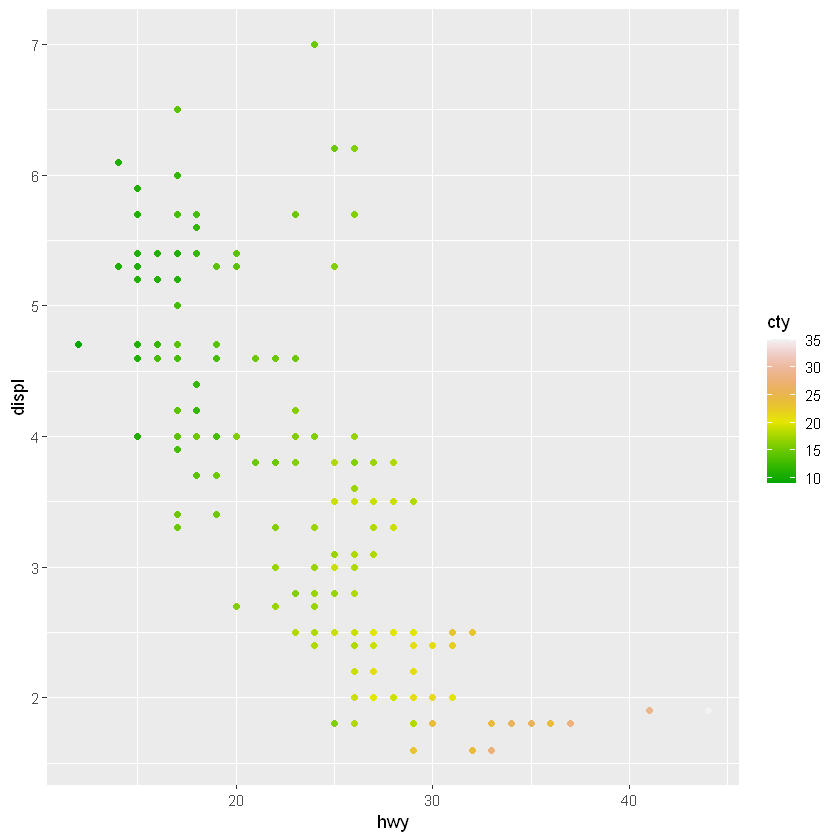

In [6]:
ggplot(mpg) + 
geom_point(aes(hwy, displ, colour = cty)) + 
scale_colour_gradientn(colours = terrain.colors(15))

Alpha scaling for continuous variable

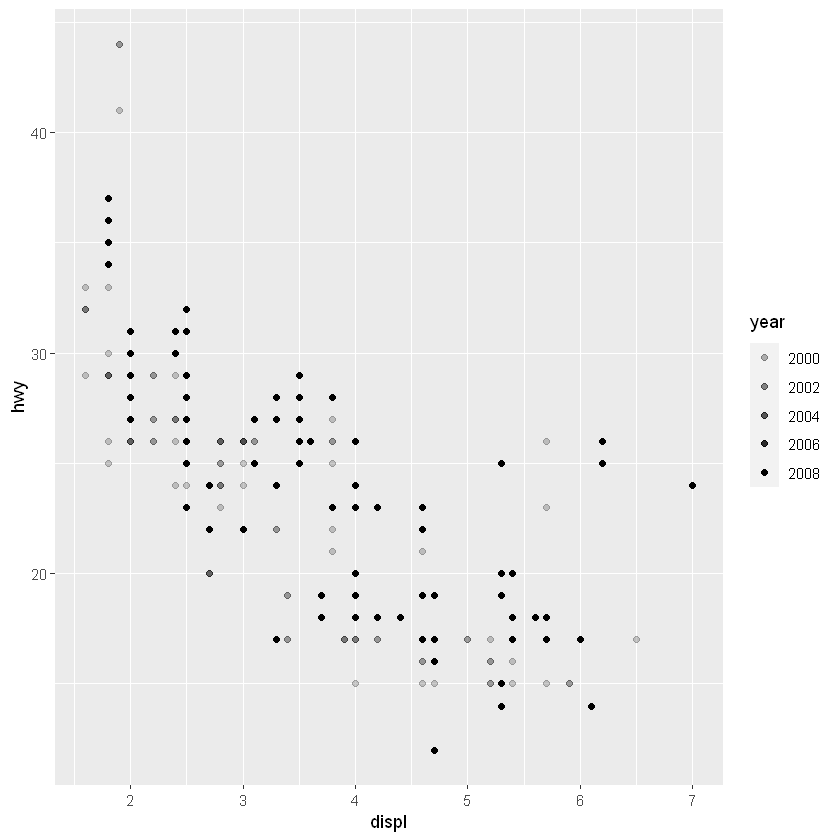

In [7]:
ggplot(mpg, aes(displ,hwy))+
geom_point(aes(alpha = year)) +
scale_alpha(range = c(0.2,1))

Alpha scaling for discrete variable

Warning message:
"Using alpha for a discrete variable is not advised."


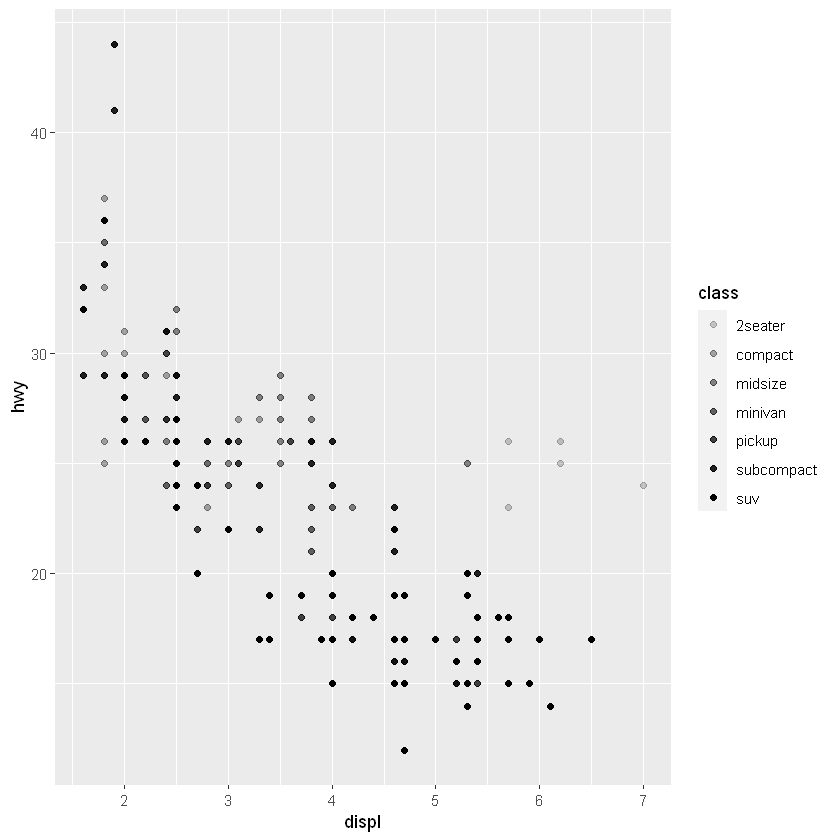

In [8]:
ggplot(mpg, aes(displ,hwy))+
geom_point(aes(alpha = class)) +
scale_alpha_discrete(range=c(0.2,1))

Color brewer scaling

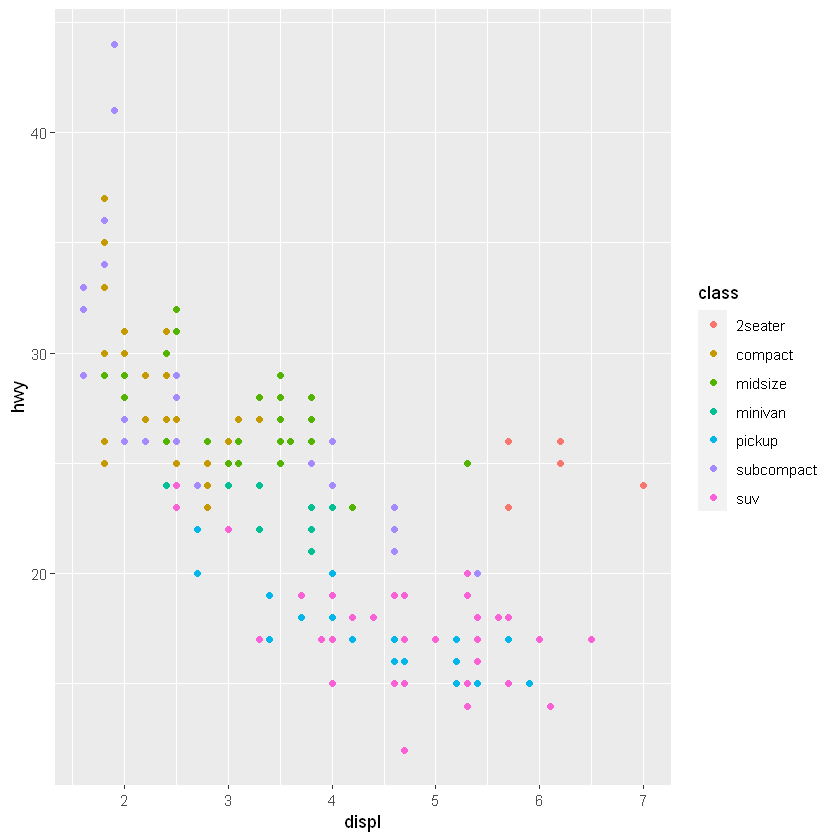

In [9]:
(p = ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(colour = class)))

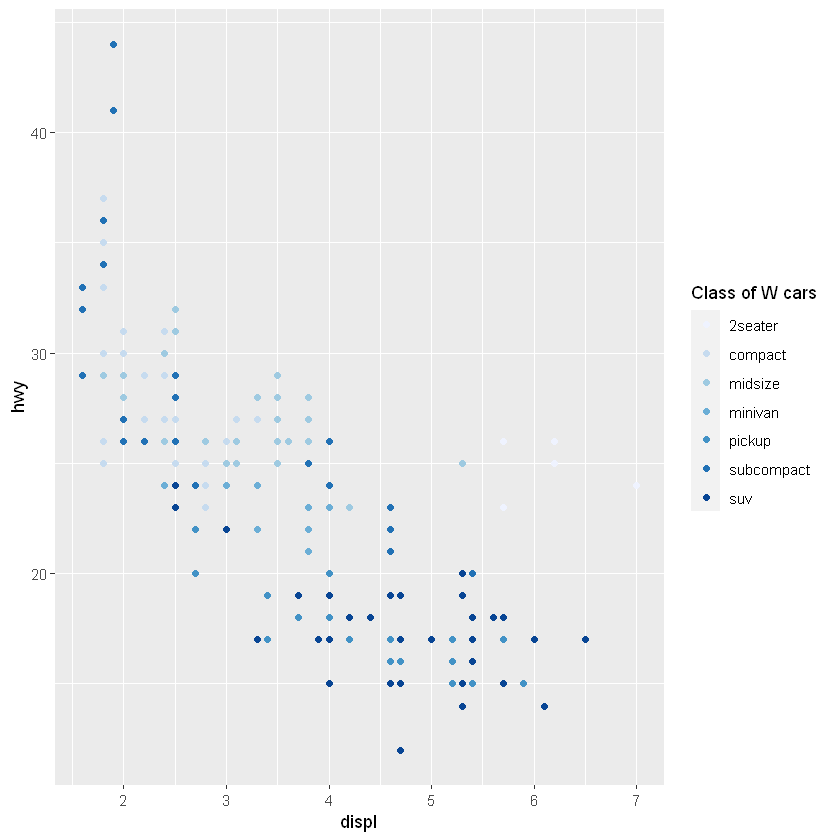

In [10]:
p + scale_colour_brewer("Class of W cars")

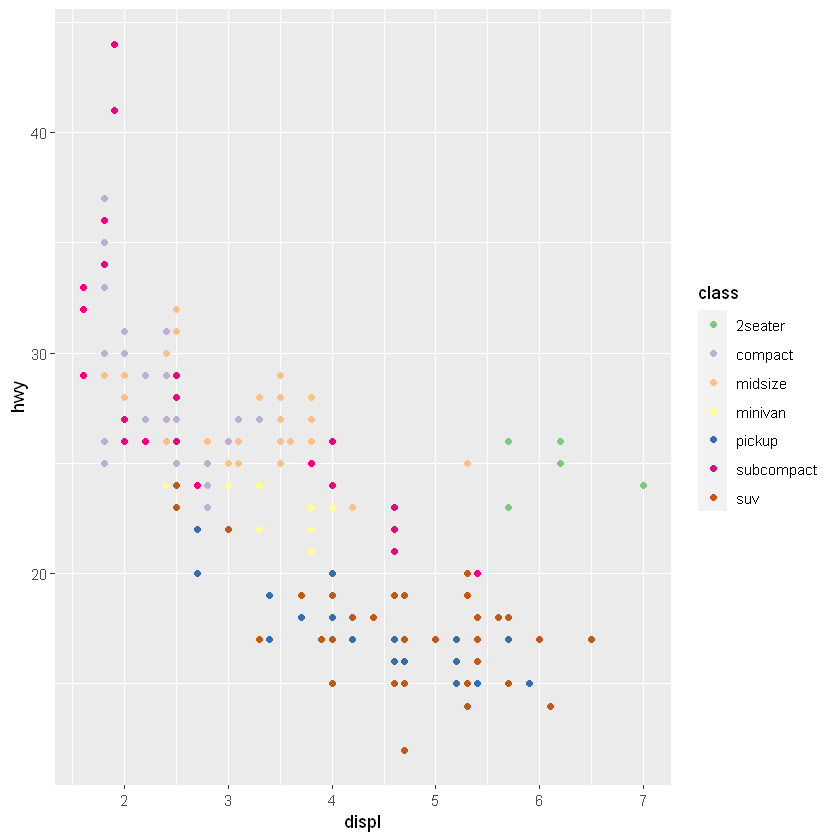

In [11]:
p + scale_colour_brewer(palette="Accent")

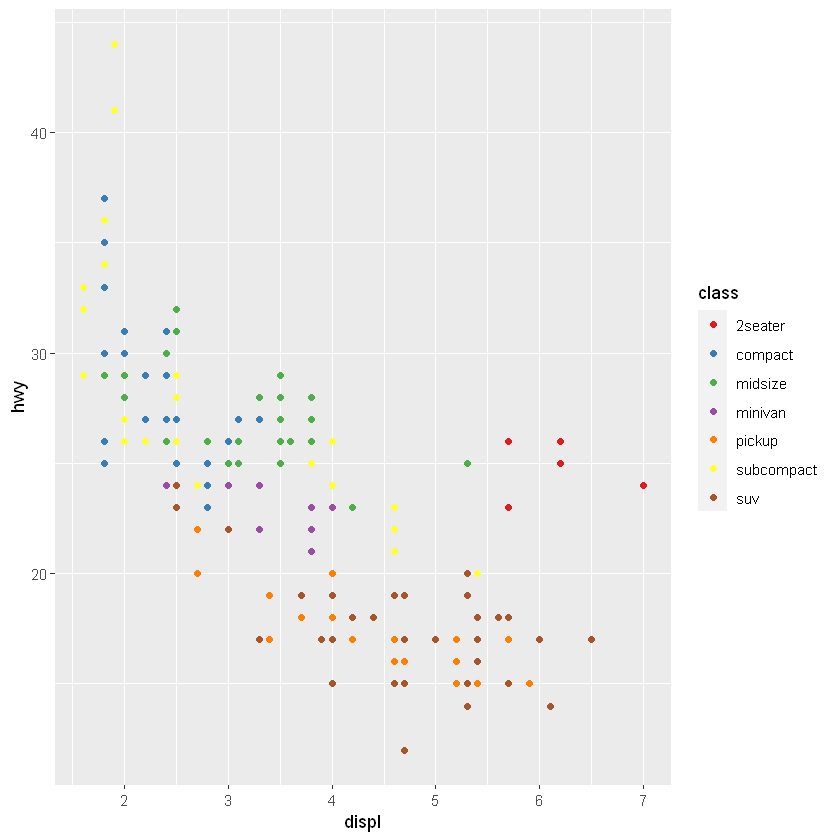

In [12]:
p + scale_color_brewer(palette = "Set1")

Color scaling for histogram

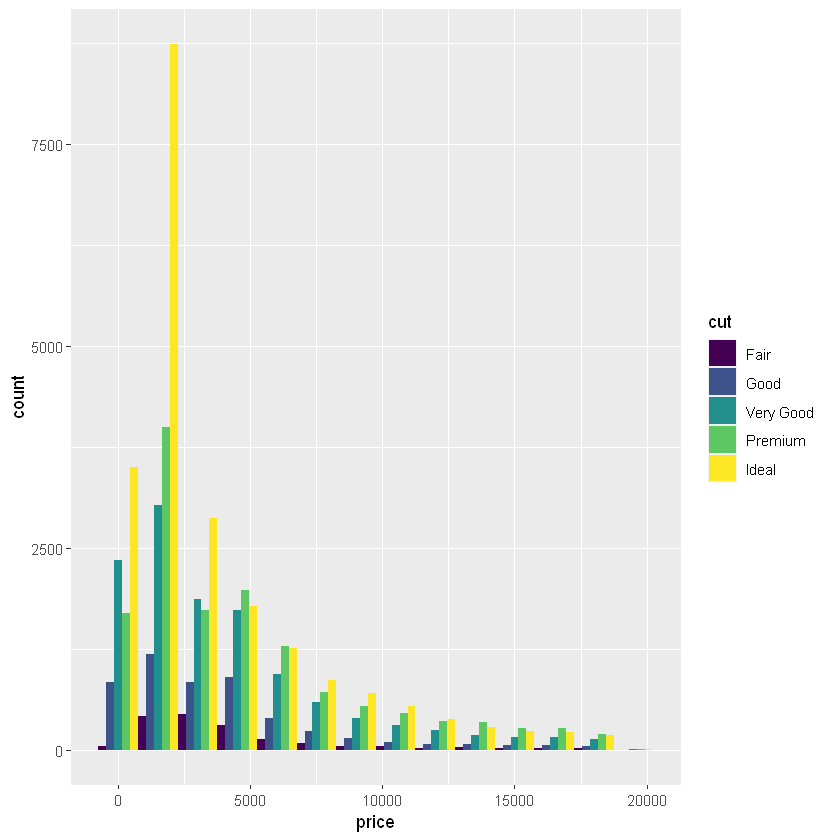

In [13]:
(h <- ggplot(diamonds, aes(x=price, fill=cut))+
geom_histogram(position = "dodge", binwidth = 1500))

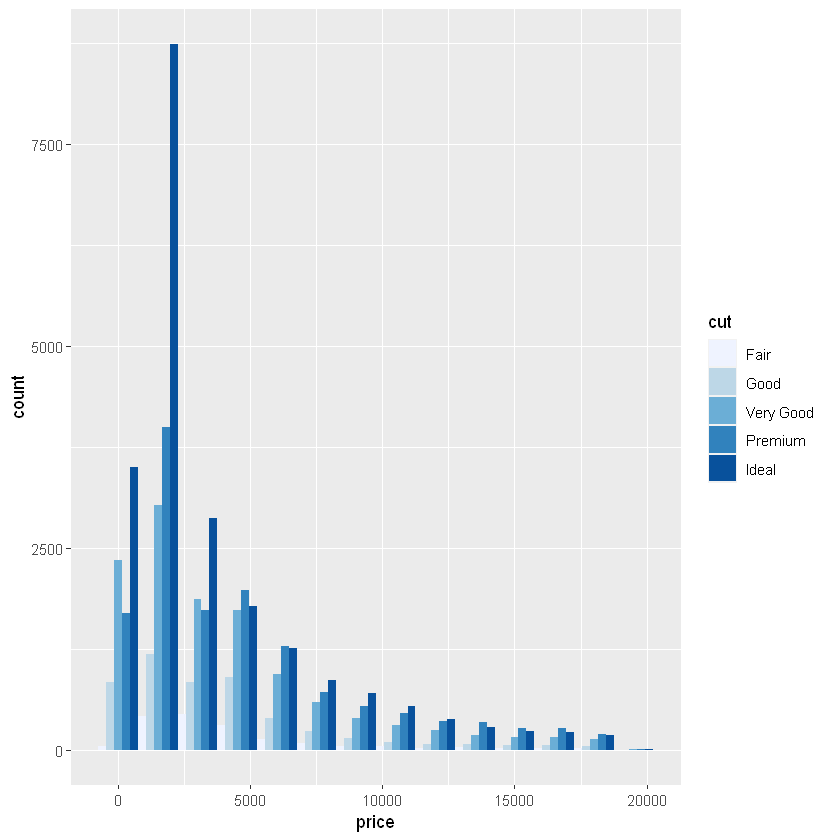

In [14]:
h + scale_fill_brewer()

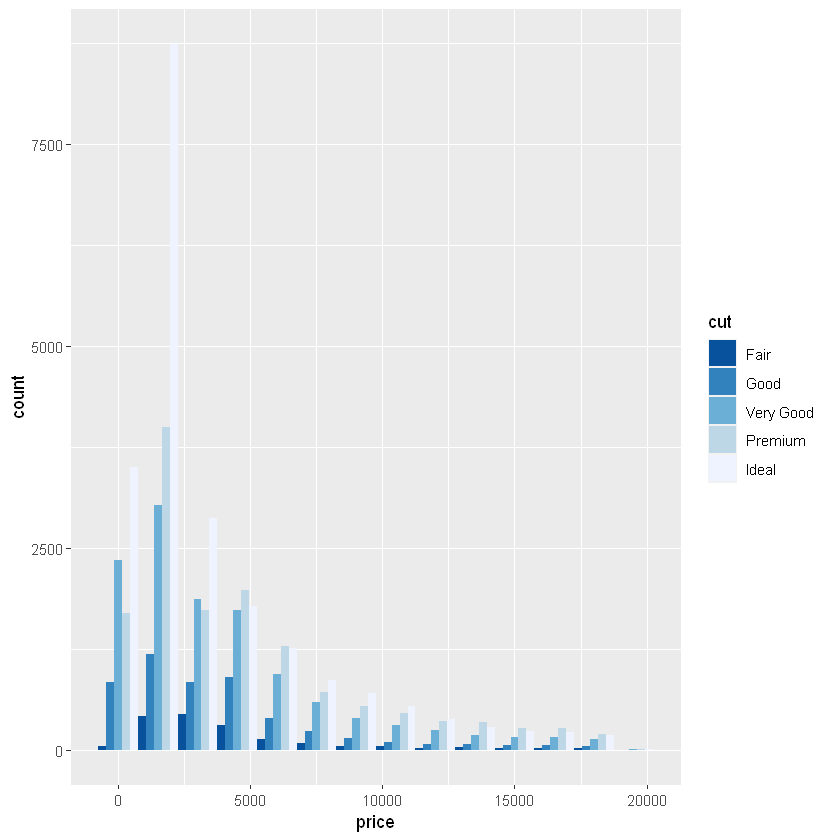

In [15]:
h + scale_fill_brewer(direction = -1)

Color scaling for heatmap

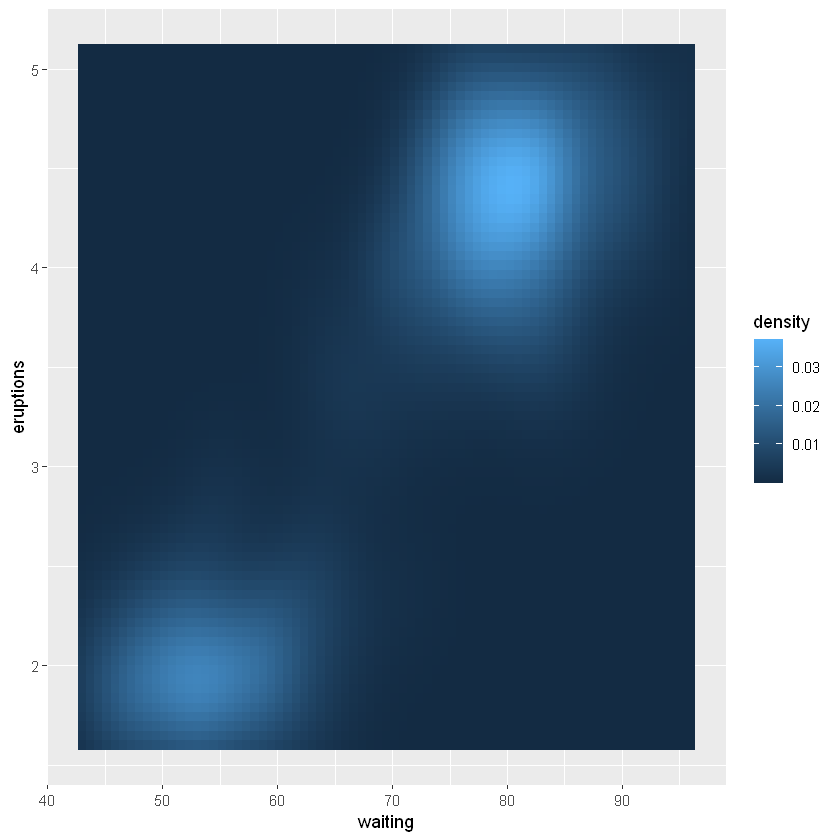

In [16]:
(v <- ggplot(faithfuld) + geom_tile(aes(waiting, eruptions, fill
= density)))

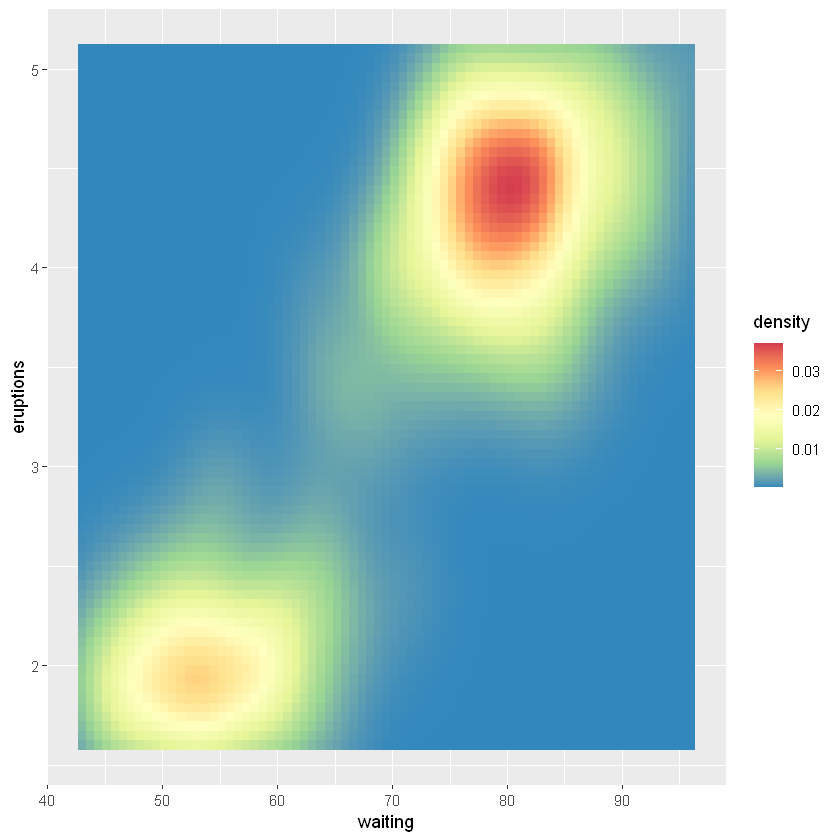

In [17]:
v + scale_fill_distiller(palette = "Spectral")

### Time Scaling

In [18]:
last_month = Sys.Date() - 0:29 # Get a list of dates in last month
head((df = data.frame( date = last_month, price = runif(30))))

,date,price
,<date>,<dbl>
1,2020-04-22,0.5536106
2,2020-04-21,0.4421253
3,2020-04-20,0.5398591
4,2020-04-19,0.3829902
5,2020-04-18,0.2266757
6,2020-04-17,0.2713736


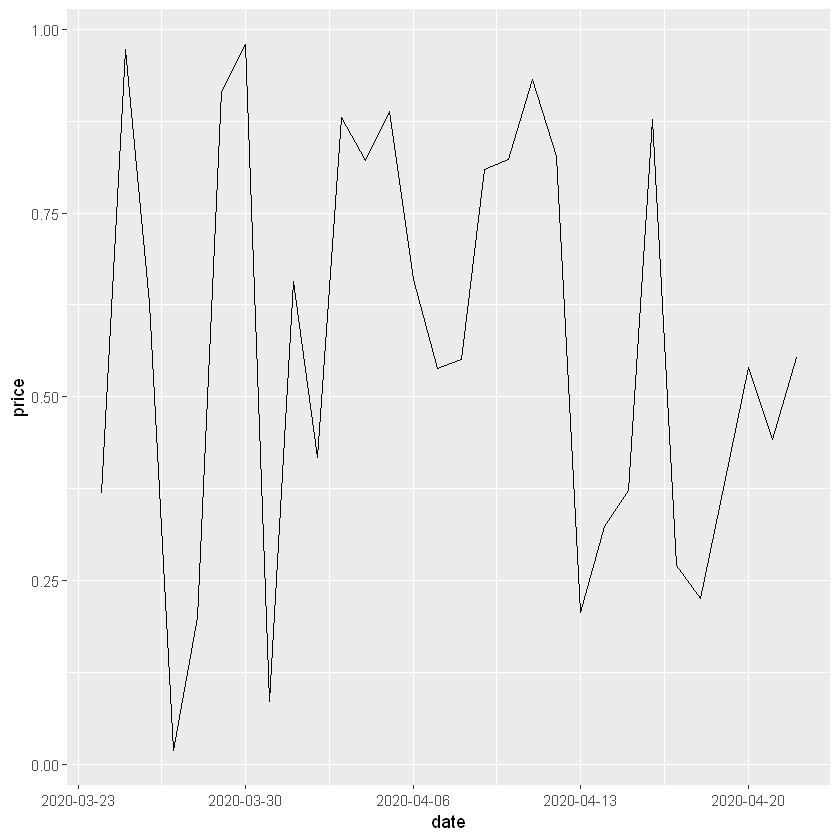

In [19]:
ggplot(df,aes(date,price))+ geom_line() + scale_x_date(date_labels = "%Y-%m-%d")

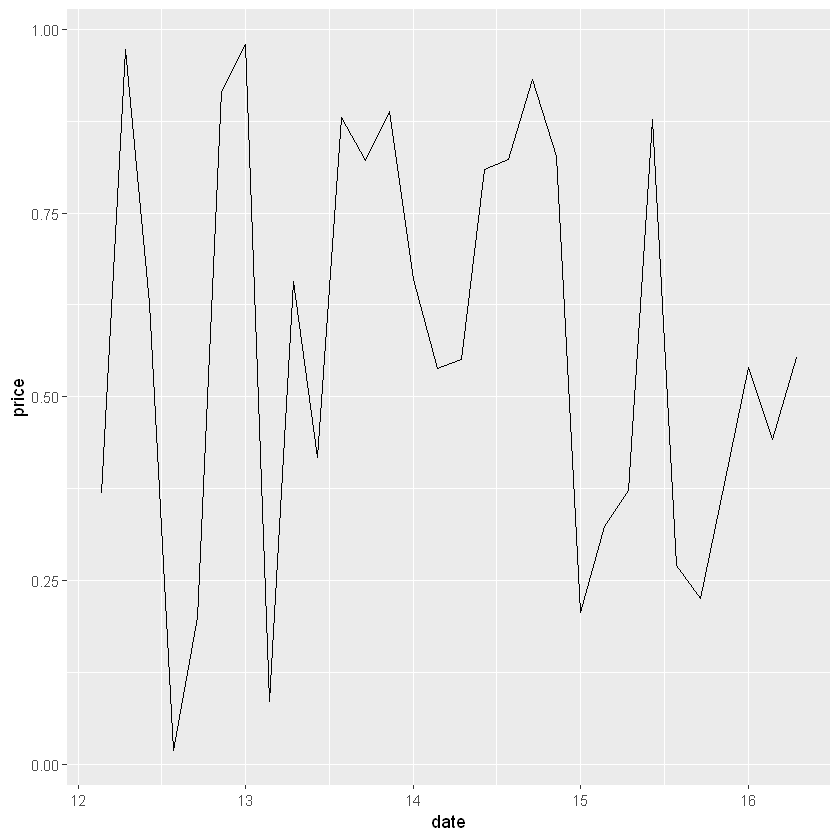

In [20]:
# date_breaks = "1 week"
ggplot(df,aes(date,price)) + geom_line() + scale_x_date(date_breaks = "1 week",date_labels = "%W")

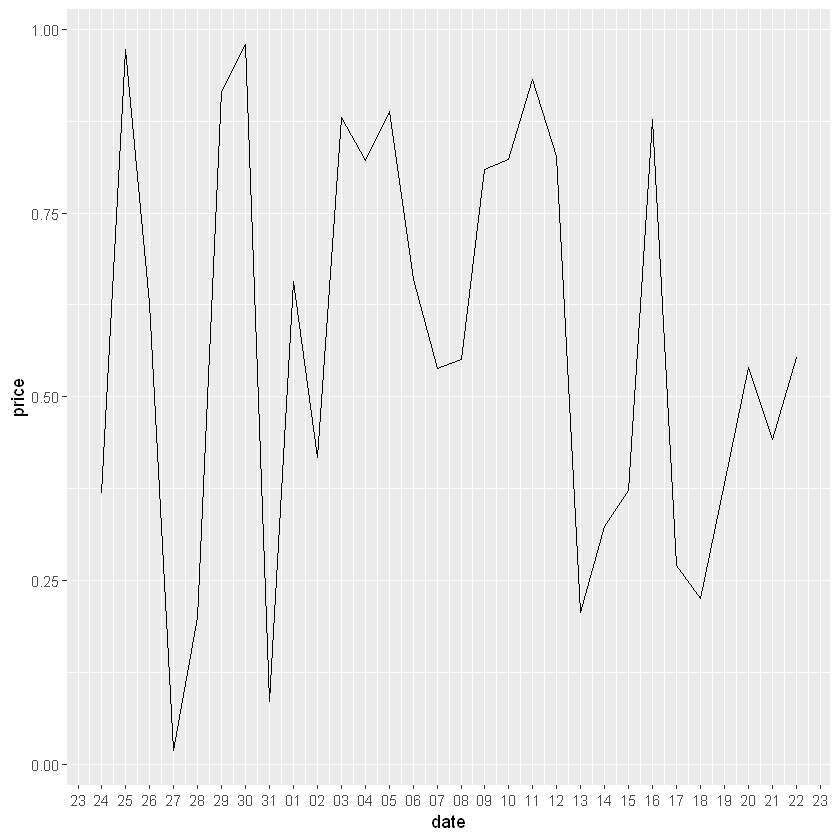

In [21]:
# date_breaks = "1 day"
ggplot(df,aes(date,price))+ geom_line() +
scale_x_date(date_breaks = "1 day",date_labels = "%d")

Warning message:
"Removed 22 row(s) containing missing values (geom_path)."


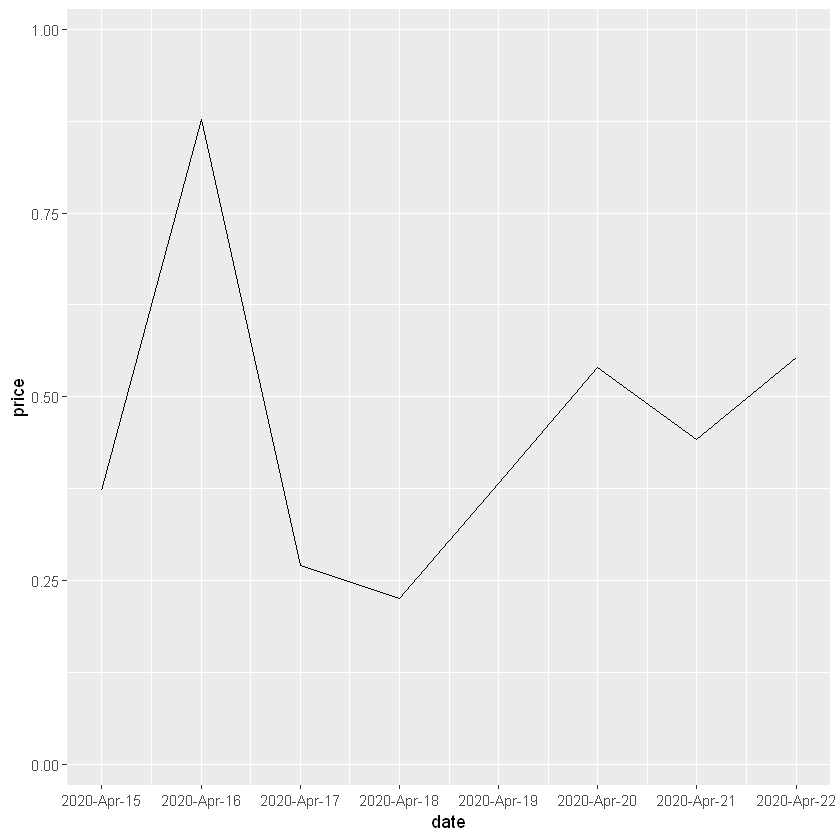

In [22]:
# Set date limit
ggplot(df,aes(date,price))+ geom_line() +
scale_x_date(date_breaks = "1 day", date_labels = "%Y-%b-%d", limits = c(Sys.Date()-7,NA))

### Divide graph into multiple facets

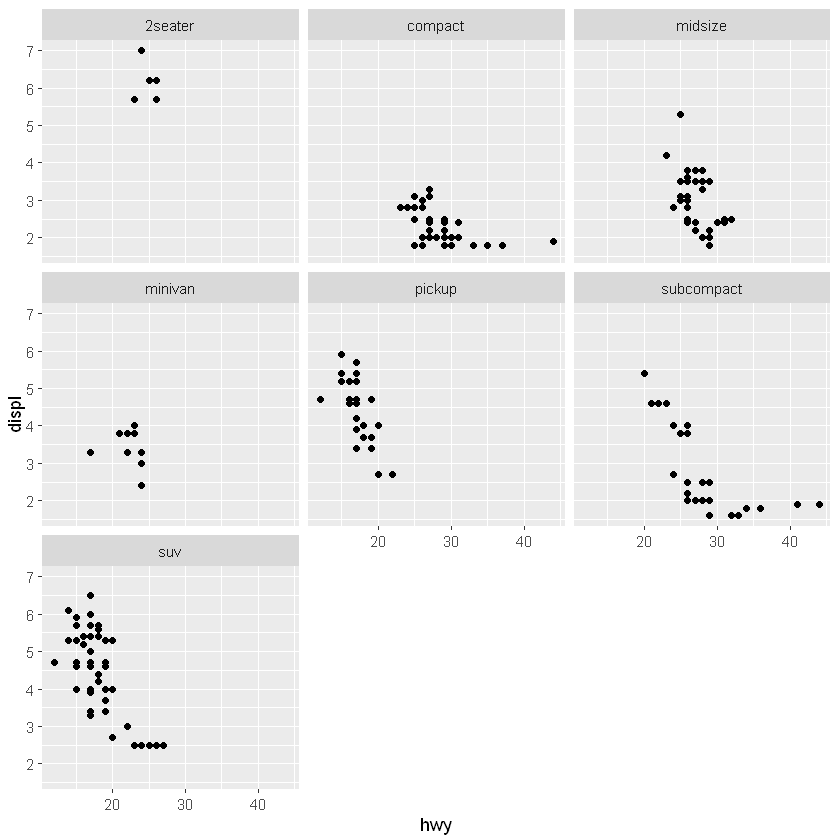

In [23]:
# Generate facets for each category in "class"
ggplot(mpg) + geom_point(aes(hwy, displ)) + facet_wrap(c("class"))

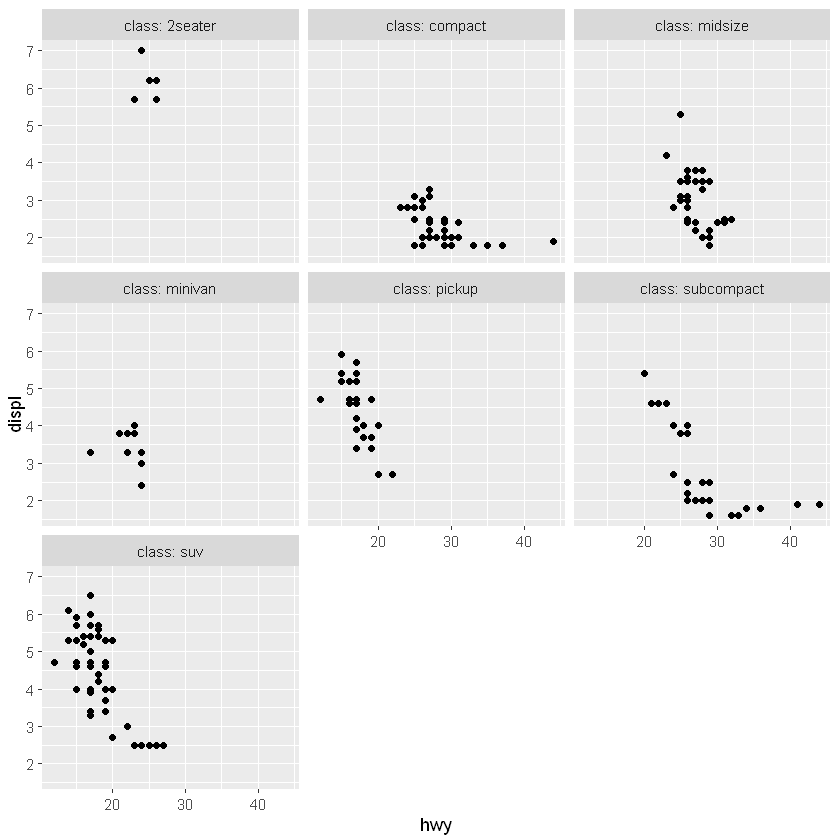

In [24]:
# Add detail to label
ggplot(mpg) + geom_point(aes(hwy, displ)) + facet_wrap(c("class"), labeller = "label_both")

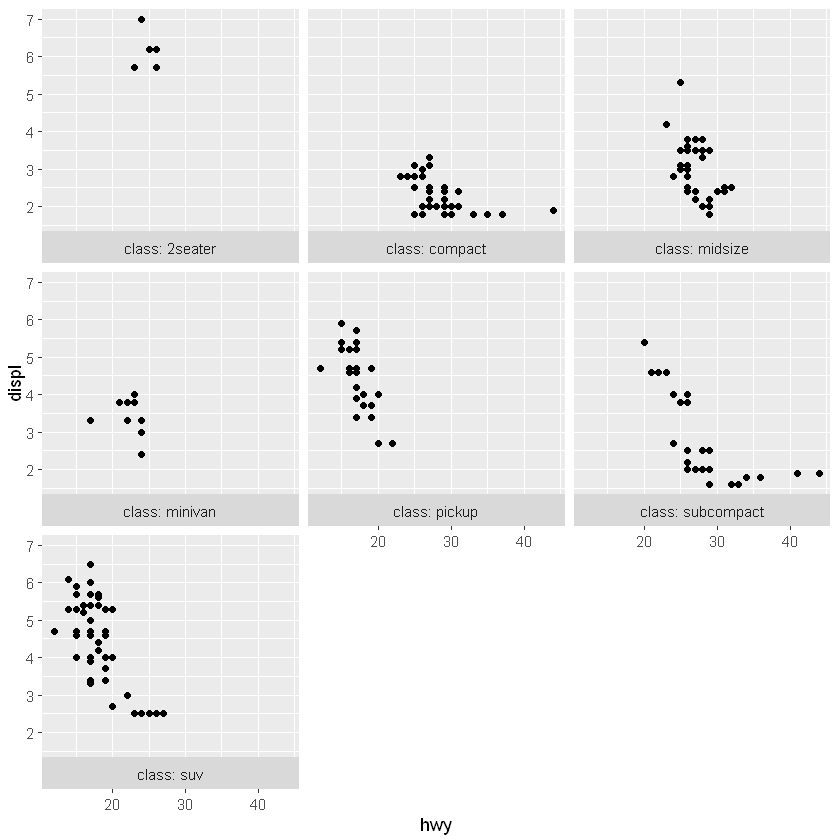

In [25]:
# Change position of label
ggplot(mpg) + geom_point(aes(hwy, displ)) +
facet_wrap(c("class"), labeller = "label_both", strip.position = "bottom")

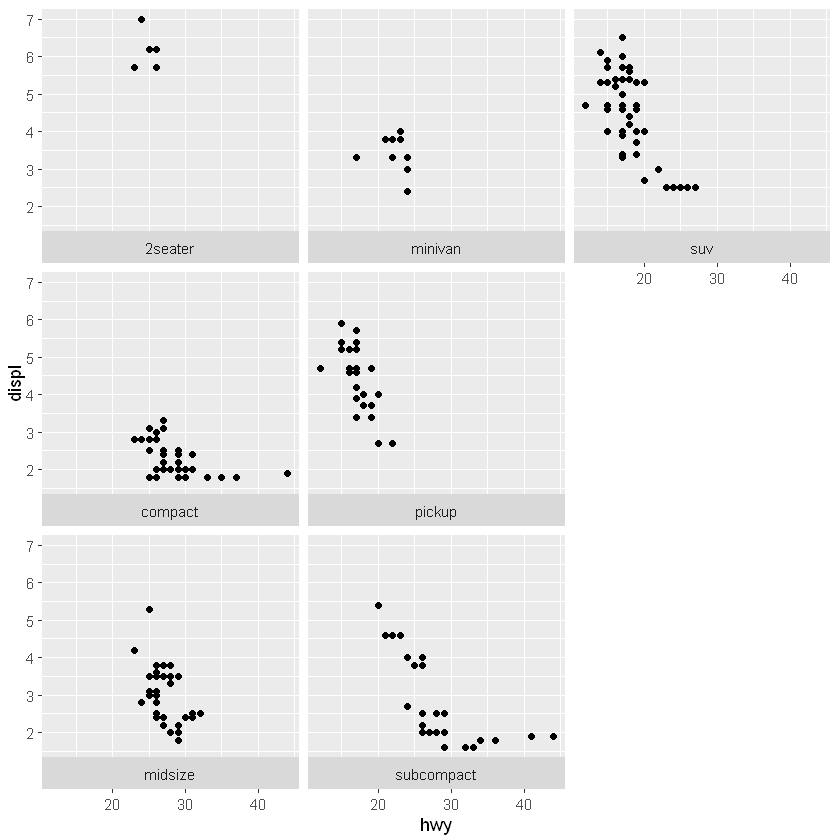

In [26]:
# Change direction of facets from horizontal to vertical
ggplot(mpg) + geom_point(aes(hwy, displ)) +
facet_wrap(c("class"), dir = "v", strip.position = "bottom")

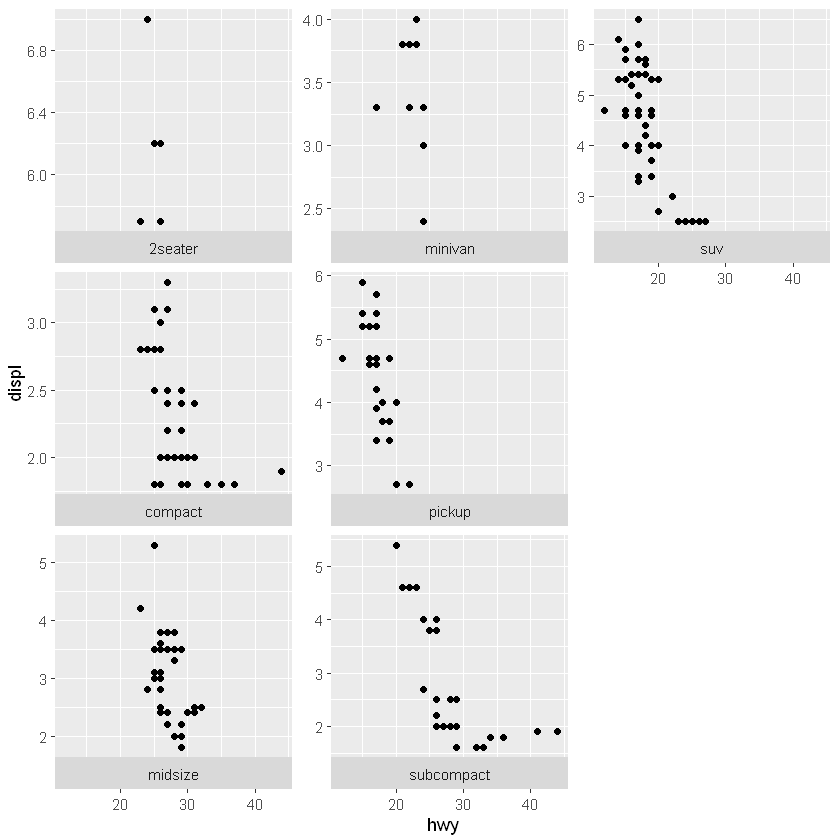

In [27]:
# Set scales to "free_y" so that each facet has its own y axis
ggplot(mpg) + geom_point(aes(hwy, displ)) +
facet_wrap(c("class"), dir = "v", strip.position = "bottom", scales = "free_y")

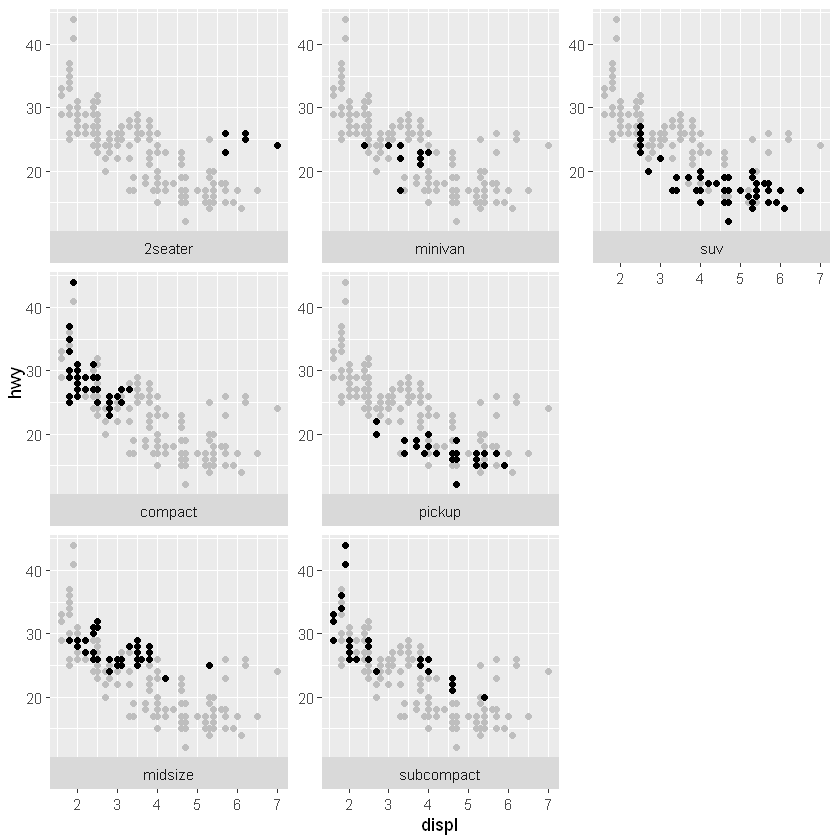

In [28]:
# To display all data and only highlight data belongs to a category of each facet
# We have to create a facet without face variable (class = NULL)
ggplot(mpg,aes(displ, hwy)) + 
geom_point(data = transform(mpg, class = NULL), colour = "grey") + 
geom_point() + 
facet_wrap(c("class"), dir = "v", strip.position = "bottom", scales = "free_y")

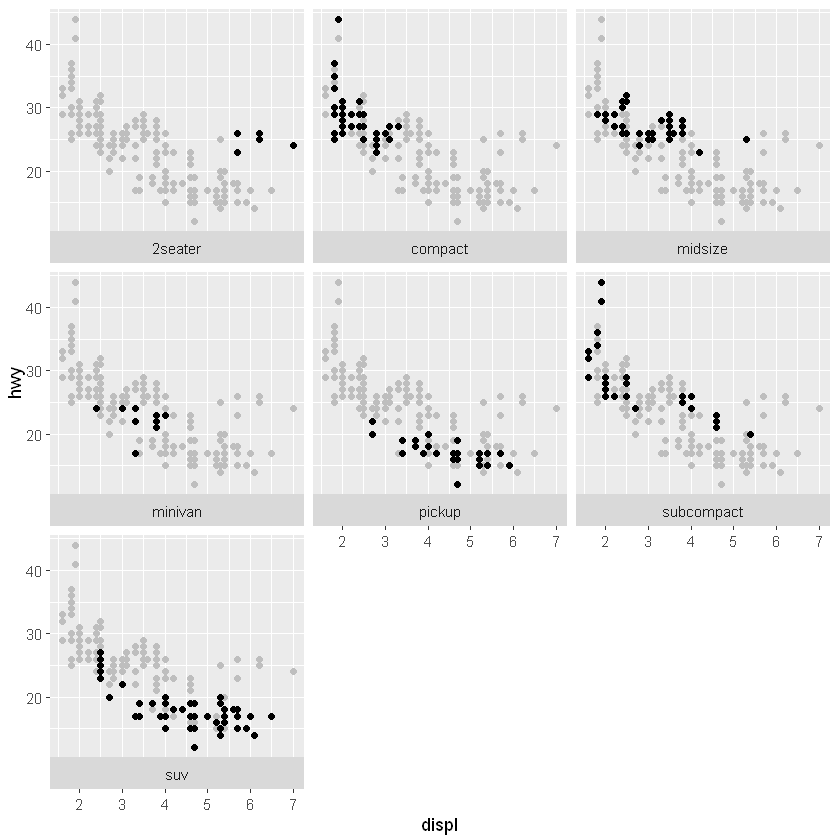

In [29]:
# Color scaling by y axis
ggplot(mpg,aes(displ, hwy)) + 
geom_point(data = transform(mpg, class= NULL), colour = "grey") + 
geom_point() +
facet_wrap(c("class"), strip.position = "bottom")

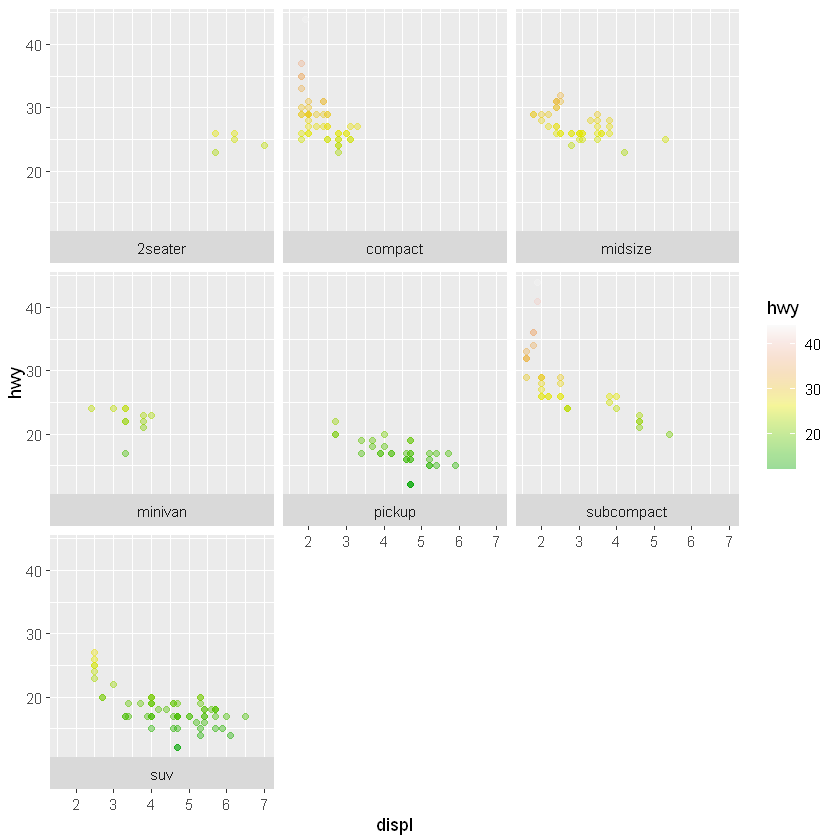

In [30]:
# Colorful scaling
ggplot(mpg,aes(displ, hwy)) + geom_point(aes(colour = hwy)) +
facet_wrap(c("class"), strip.position = "bottom") + 
scale_color_gradientn(colours = terrain.colors(10,alpha = 0.4))

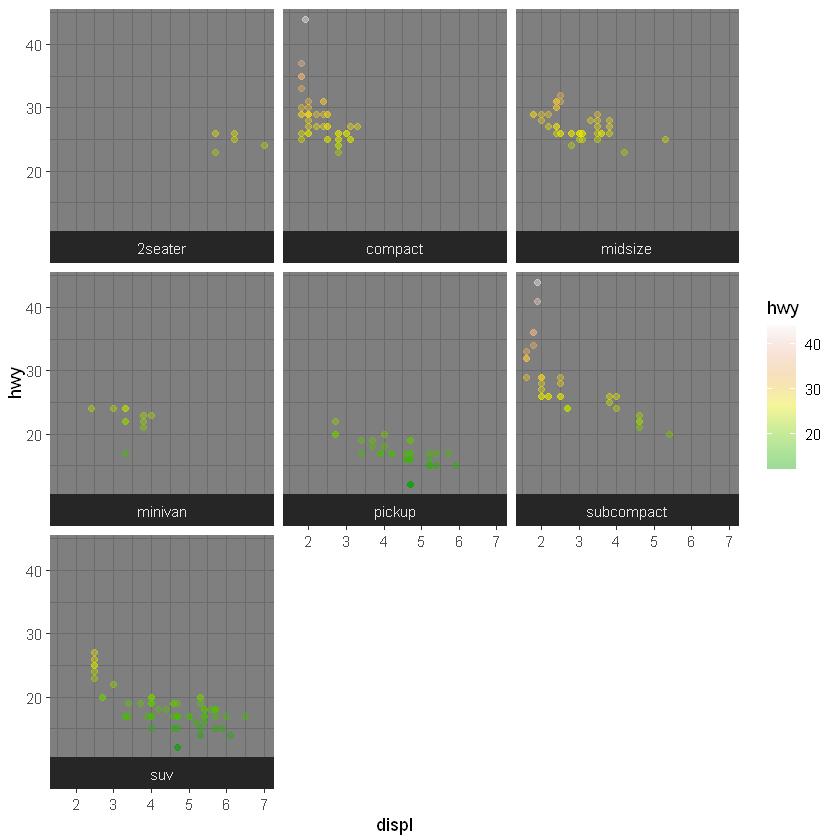

In [31]:
# Set dark theme
ggplot(mpg,aes(displ, hwy)) + geom_point(aes(colour = hwy)) +
theme_dark() + facet_wrap(c("class"), strip.position = "bottom") +
scale_color_gradientn(colours = terrain.colors(10,alpha = 0.4))

### Scale limits

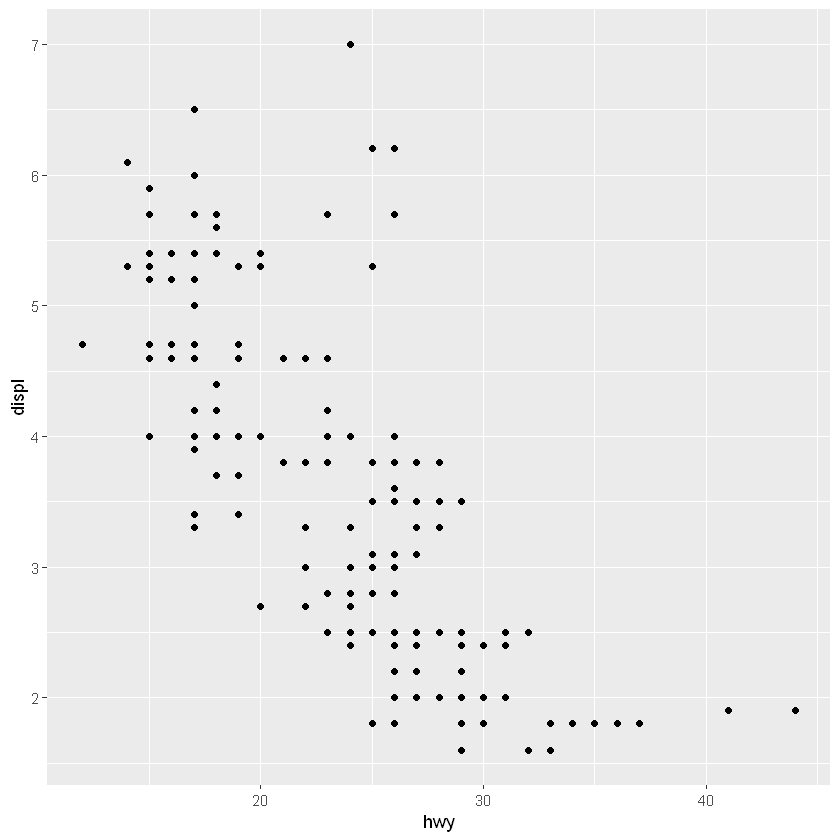

In [32]:
(org = ggplot(mpg) + geom_point(aes(hwy, displ)))

Warning message:
"Removed 152 rows containing missing values (geom_point)."


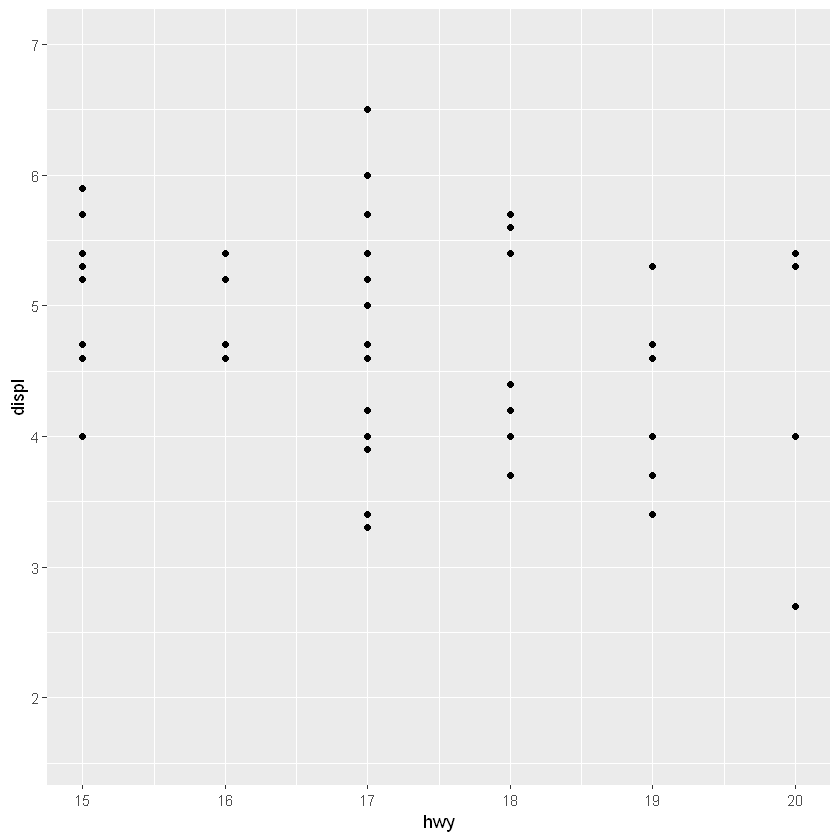

In [33]:
# Set limit of x from 15 to 20
org + xlim(15, 20)

Warning message:
"Removed 100 rows containing missing values (geom_point)."


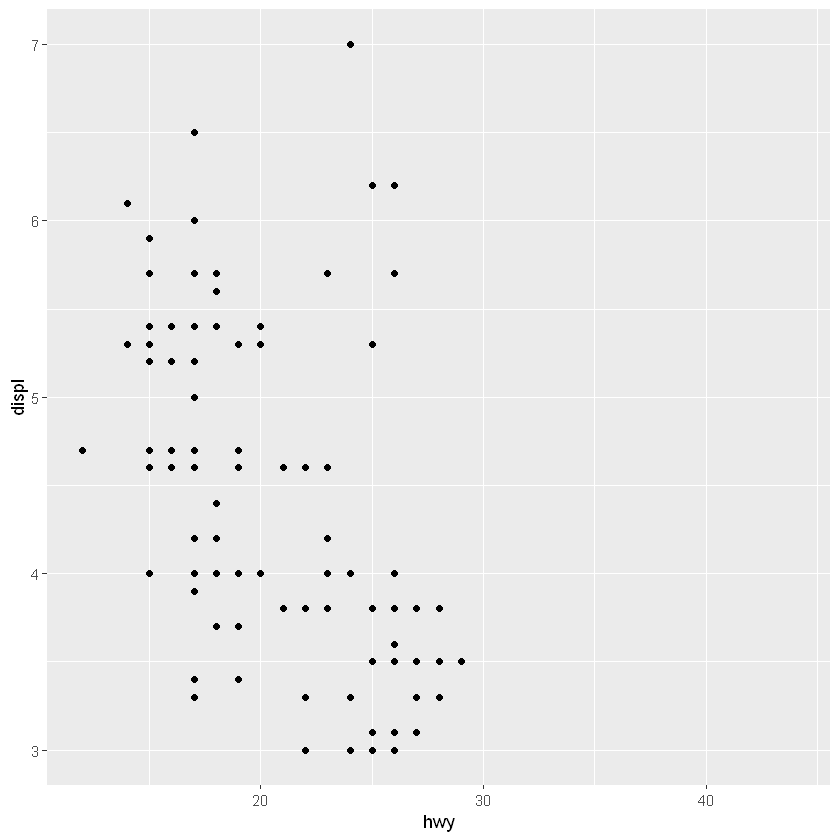

In [34]:
# Set limit of y from 3 to 7
org + ylim(3, 7)

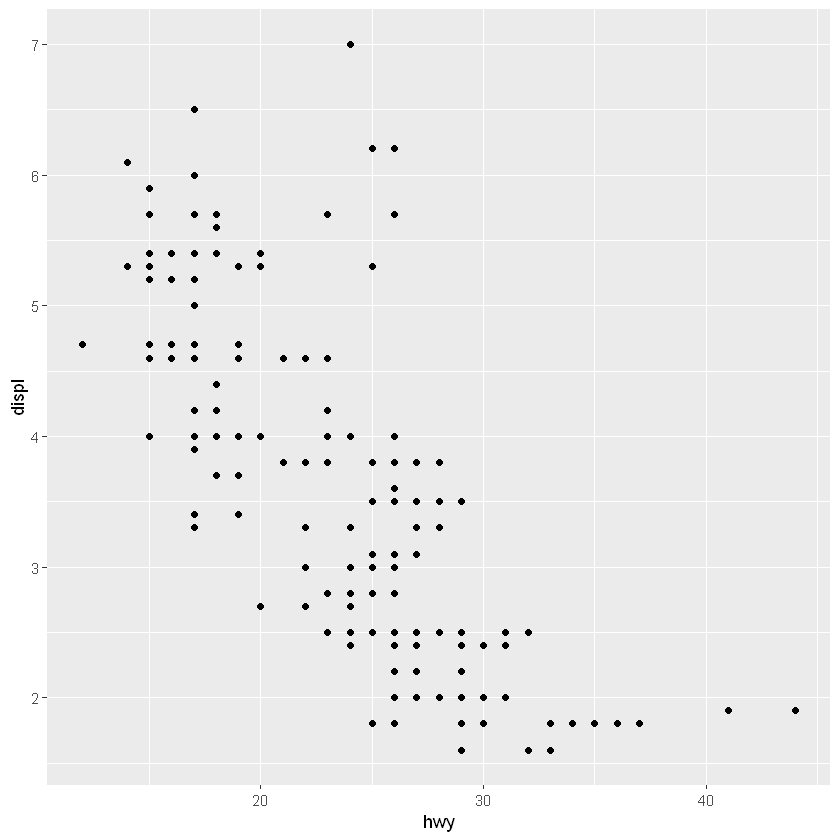

In [35]:
# Limit data points to a few categories
org + lims(colour = c("compact","midsize","suv","minivan"))

## 2. Line graph

### Single line

In [36]:
head((df = pressure))

,temperature,pressure
,<dbl>,<dbl>
1,0,0.0002
2,20,0.0012
3,40,0.0060
4,60,0.0300
5,80,0.0900
6,100,0.2700


In [37]:
# Generate simple line graph
org = ggplot(df, aes(x=temperature, y=pressure)) + geom_line()

Warning message:
"Removed 15 row(s) containing missing values (geom_path)."


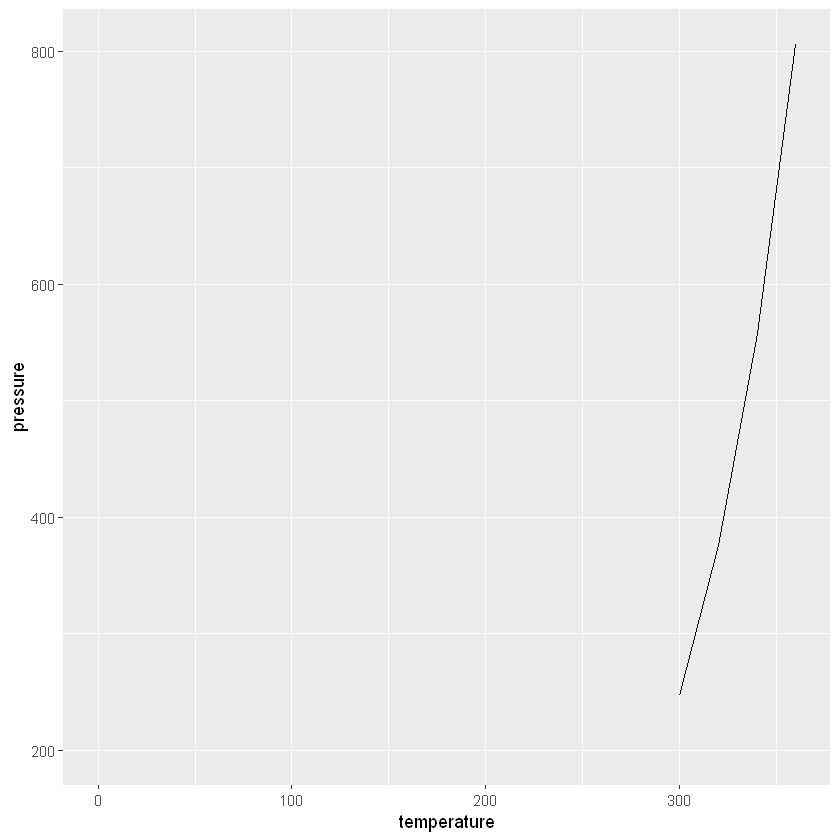

In [38]:
# Set limits
org + ylim(200, max(pressure))

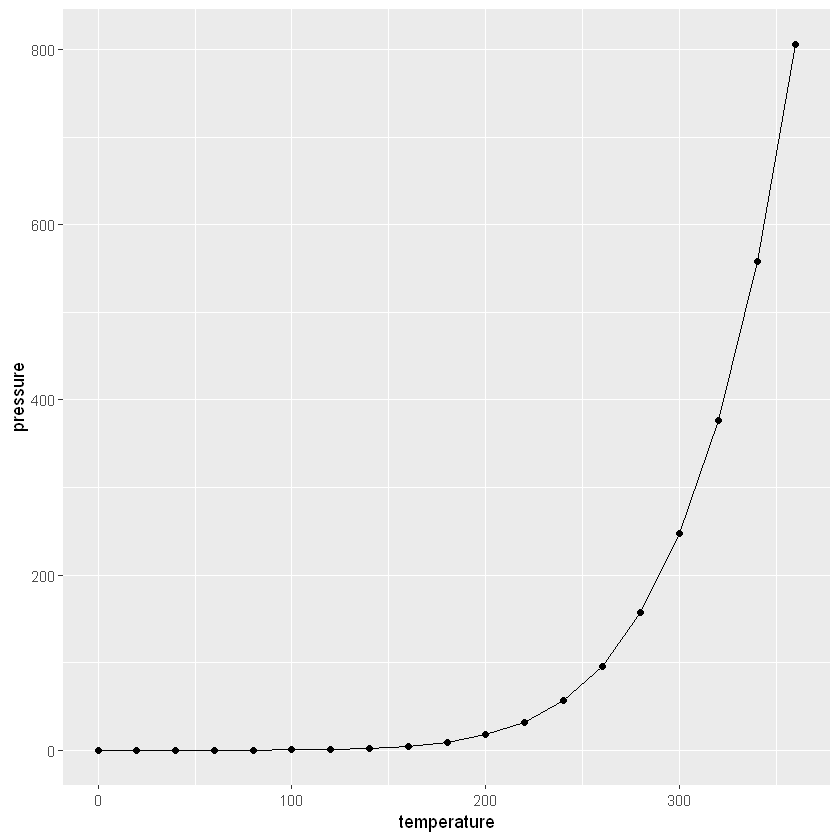

In [39]:
# Add point to line graph
org + geom_point()

### Multiple lines

In [40]:
nmonths = 24
x = seq(as.Date("2015/1/1"), by = "month", length.out = nmonths)
df1 = data.frame(dates = x,Variable = rnorm(mean = 0.75,nmonths))
df2 = data.frame(dates = x,Variable = rnorm(mean = -0.75,nmonths))
df3 = data.frame(dates = x,Variable = rnorm(mean = 0.3,nmonths))
head(df1)

,dates,Variable
,<date>,<dbl>
1,2015-01-01,3.612606728
2,2015-02-01,0.240740391
3,2015-03-01,1.549356371
4,2015-04-01,-0.007750393
5,2015-05-01,0.068579133
6,2015-06-01,0.867836493


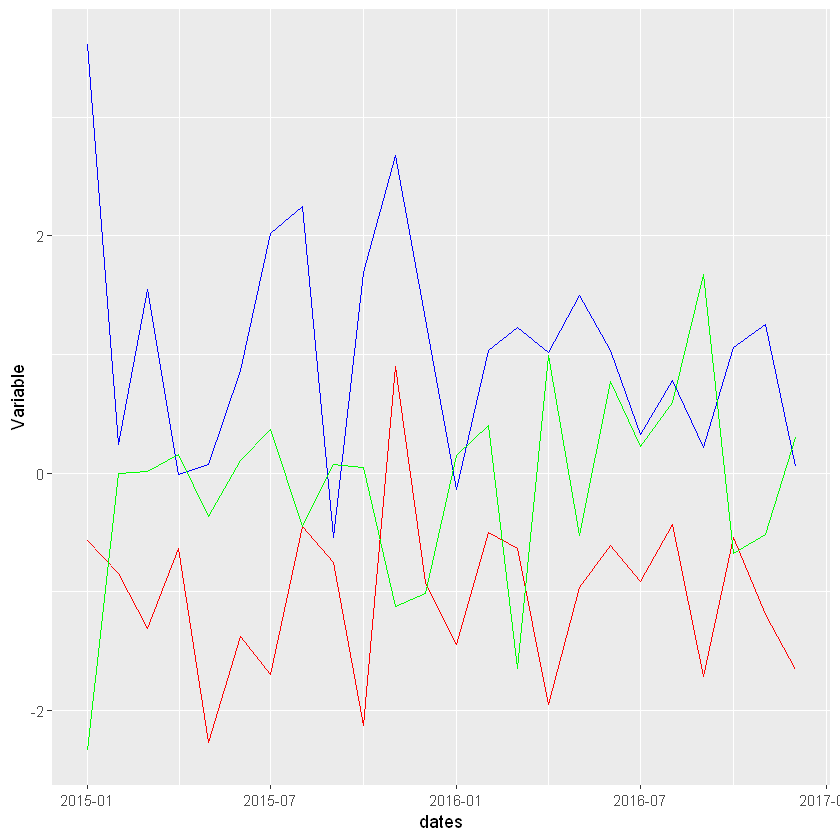

In [41]:
(p = ggplot() + geom_line(data = df1, aes(x = dates, y = Variable), color = "blue") + 
 geom_line(data = df2, aes(x = dates, y = Variable), color = "red") + 
 geom_line(data = df3, aes(x = dates, y = Variable), color = "green"))

In [42]:
# Create 3 categories for 3 df and concatenate them together
library(dplyr)
df = df1 %>% mutate(cat = "A") %>% bind_rows(df2 %>% mutate(cat = "B")) %>% bind_rows(df3 %>% mutate(cat = "C"))
head(df)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,dates,Variable,cat
,<date>,<dbl>,<chr>
1,2015-01-01,3.612606728,A
2,2015-02-01,0.240740391,A
3,2015-03-01,1.549356371,A
4,2015-04-01,-0.007750393,A
5,2015-05-01,0.068579133,A
6,2015-06-01,0.867836493,A


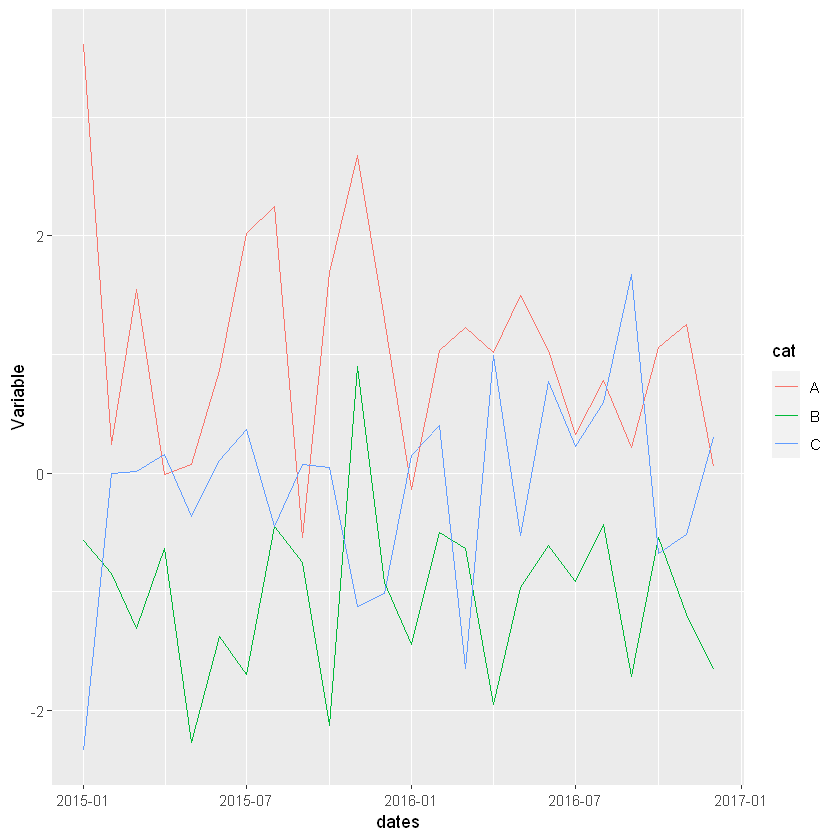

In [43]:
ggplot(df, aes(x = dates, y = Variable, color = cat)) + geom_line()

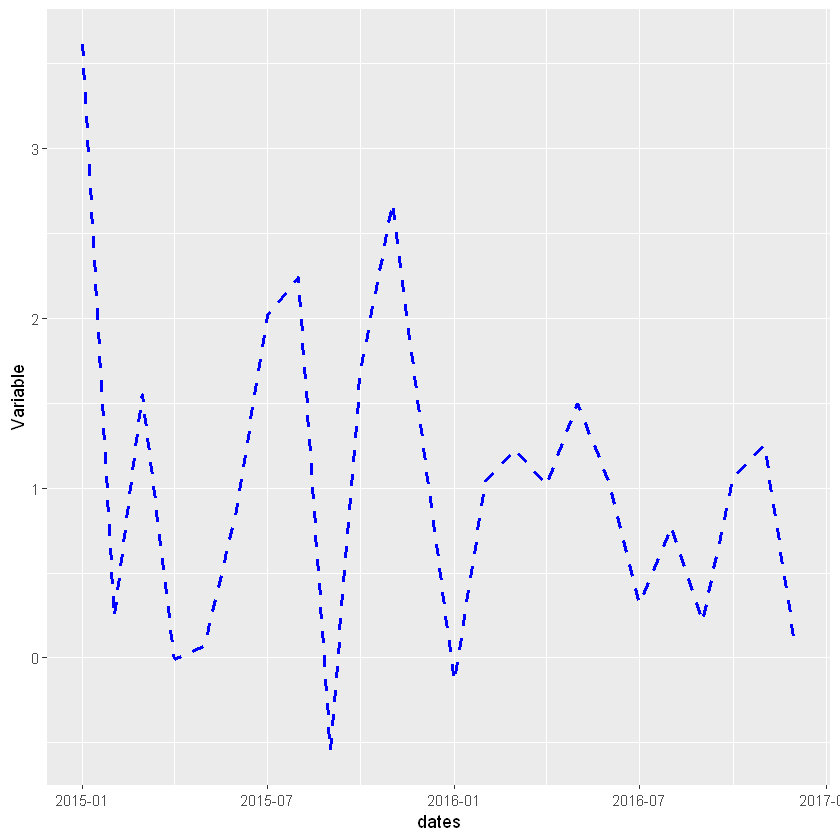

In [44]:
# Change line shape
ggplot(df1, aes(x = dates, y = Variable)) + geom_line(linetype="dashed", size=1, colour="blue")

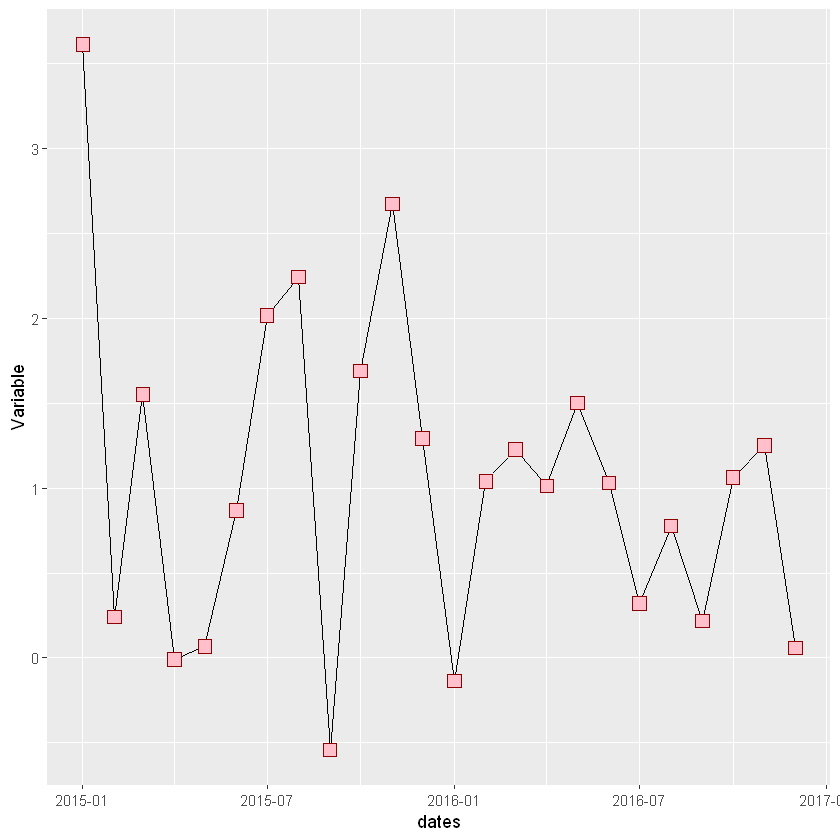

In [45]:
# Change point shape
ggplot(df1, aes(x = dates, y = Variable)) + geom_line() + geom_point(size=4, shape=22, colour="darkred", fill="pink")

## 3. Shaded Area Graph

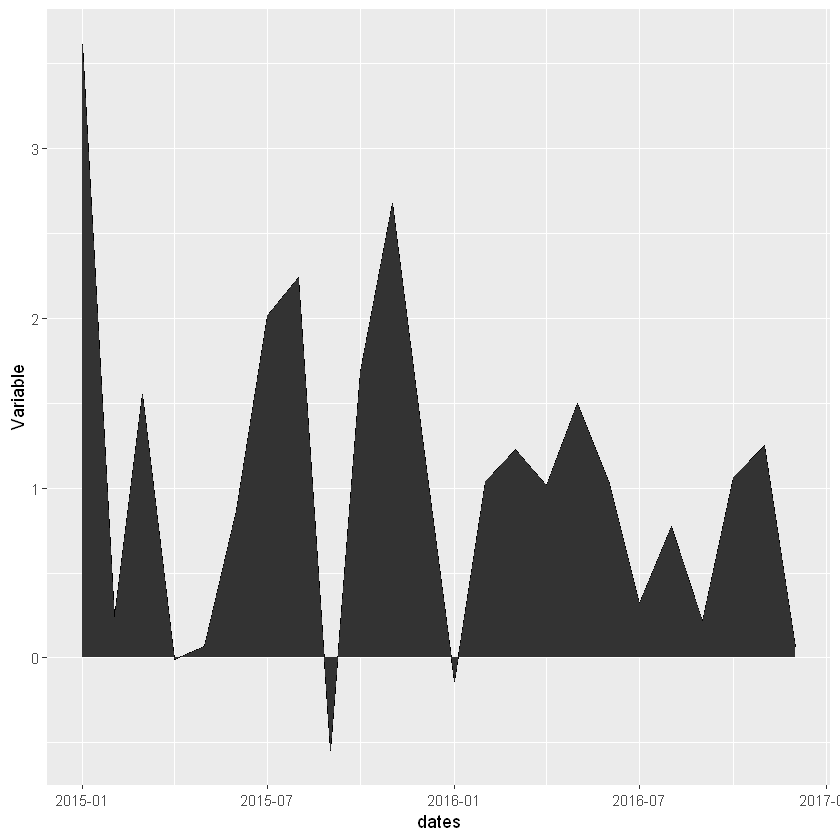

In [46]:
ggplot(df1, aes(x = dates, y = Variable)) + geom_line() + geom_area()

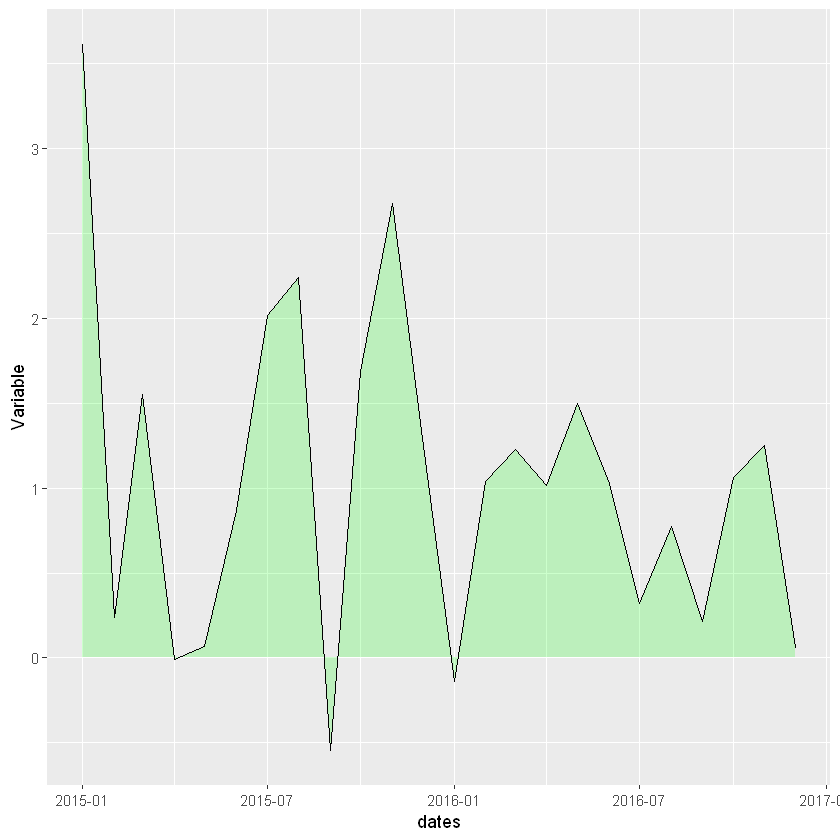

In [47]:
ggplot(df1, aes(x = dates, y = Variable)) + geom_line() +
geom_area(colour="black", fill="green", alpha=.2)

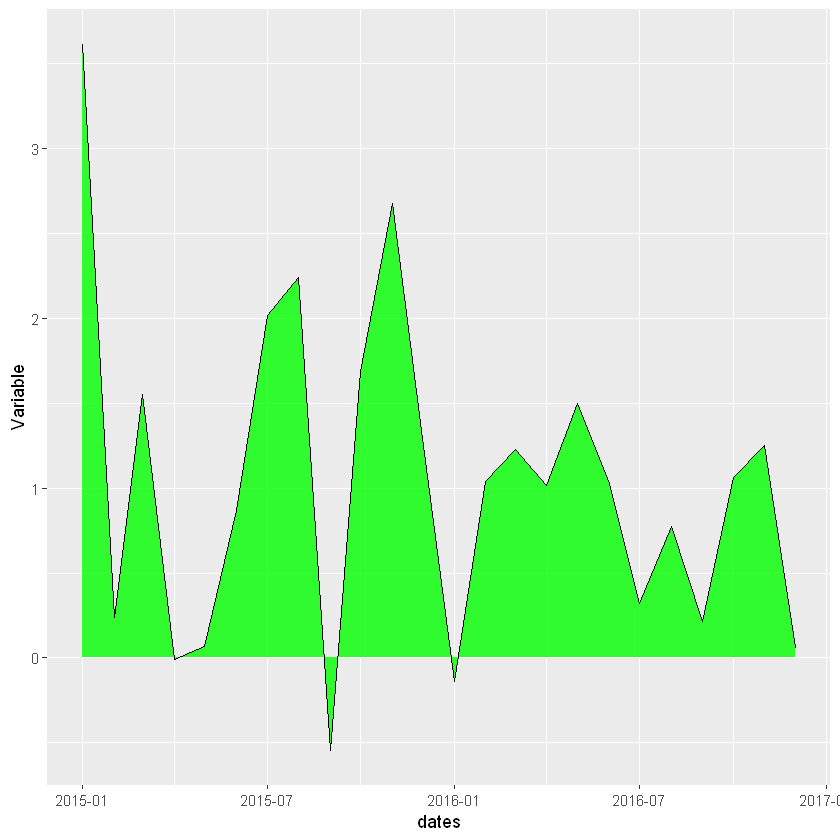

In [48]:
ggplot(df1, aes(x = dates, y = Variable)) + geom_line() +
geom_area(colour="black", fill="green", alpha=.8)

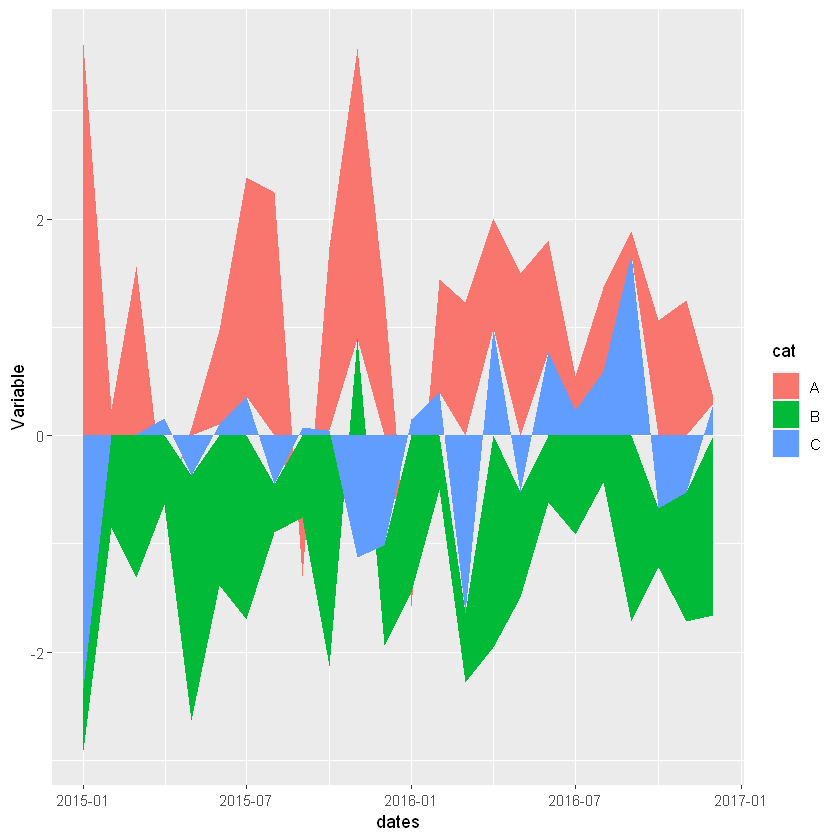

In [49]:
ggplot(df, aes(x = dates, y = Variable, fill = cat)) + geom_area()

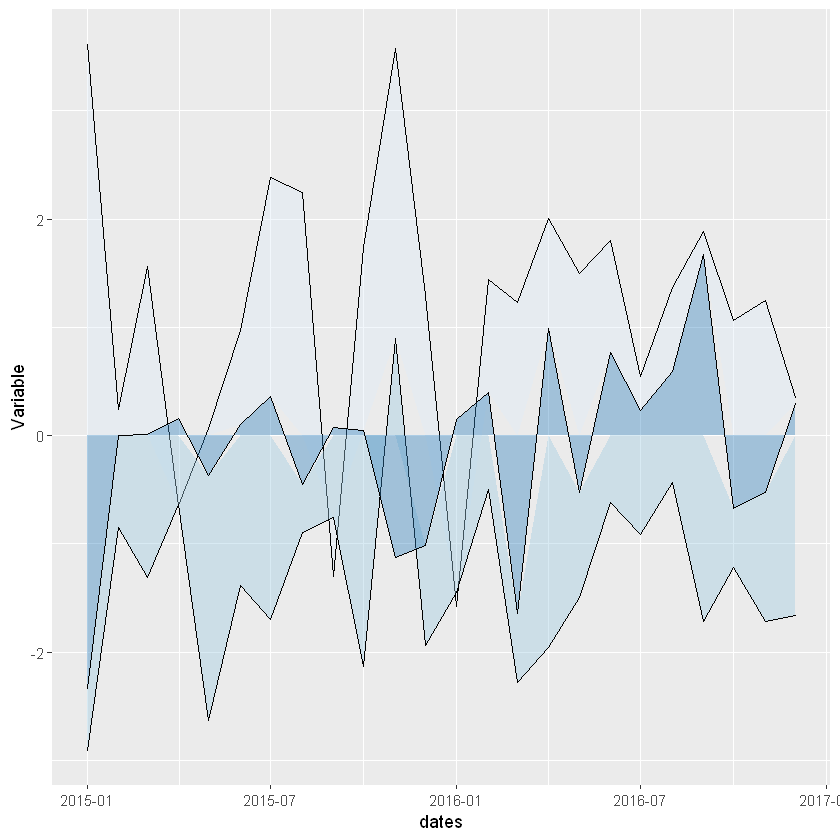

In [50]:
ggplot(df, aes(x = dates, y = Variable, fill = cat)) +
geom_area(colour="black", size=.2, alpha=.4) +
scale_fill_brewer(palette="Blues", breaks=rev(levels(cat)))

In [51]:
# Function to calculate confidence interval for a variable:

confidence_interval = function(vector, interval) {
    # Standard deviation of sample
    vec_sd = sd(vector)
    # Sample size
    n = length(vector)
    # Mean of sample
    vec_mean = mean(vector)
    # Error according to t distribution
    error = qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
    # Confidence interval as a vector
    result = data.frame("lower" = vector - error, "upper" = vector + error)
    return(result)
}

In [52]:
vector = c(12, 17, 24, 35, 23, 34, 56)
confidence_interval(vector, 0.90)

lower,upper
<dbl>,<dbl>
1.258268,22.74173
6.258268,27.74173
13.258268,34.74173
24.258268,45.74173
12.258268,33.74173
23.258268,44.74173
45.258268,66.74173


In [53]:
library(magrittr)
range <- confidence_interval(df1$Variable, 0.95)
df1 <- cbind(df1, range)
head(df1)

,dates,Variable,lower,upper
,<date>,<dbl>,<dbl>,<dbl>
1,2015-01-01,3.612606728,3.2039286,4.0212848
2,2015-02-01,0.240740391,-0.1679377,0.6494185
3,2015-03-01,1.549356371,1.1406783,1.9580345
4,2015-04-01,-0.007750393,-0.4164285,0.4009277
5,2015-05-01,0.068579133,-0.3400990,0.4772572
6,2015-06-01,0.867836493,0.4591584,1.2765146


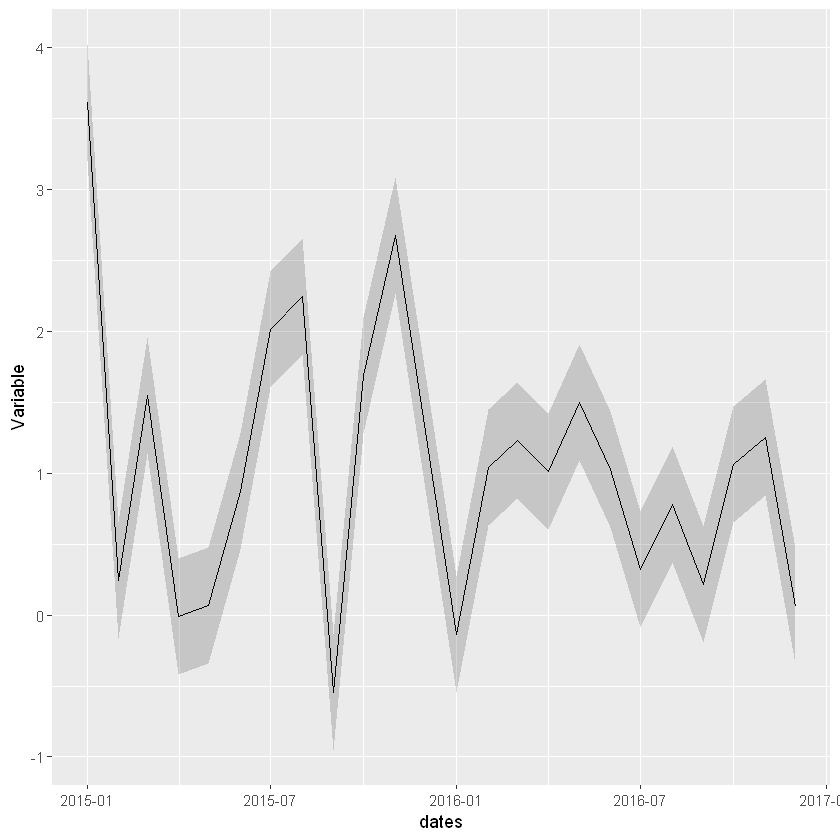

In [54]:
# Add confidence region
ggplot(df1, aes(x = dates, y= Variable)) +
geom_ribbon(aes(ymin = lower, ymax = upper), alpha=0.2) +
geom_line()

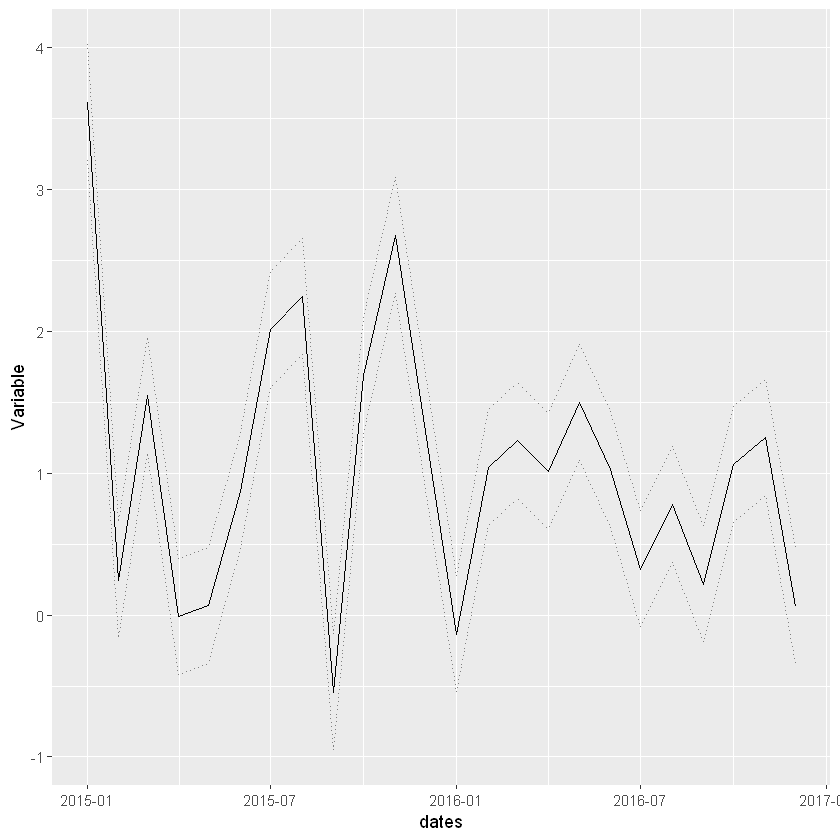

In [55]:
# With a dotted line for upper and lower bounds
ggplot(df1, aes(x=dates, y=Variable)) +
geom_line(aes(y=lower), colour="grey50", linetype="dotted") +
geom_line(aes(y=upper), colour="grey50", linetype="dotted") + 
geom_line()

## 4. Time Series Graph

### Single Time Series plot

In [56]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


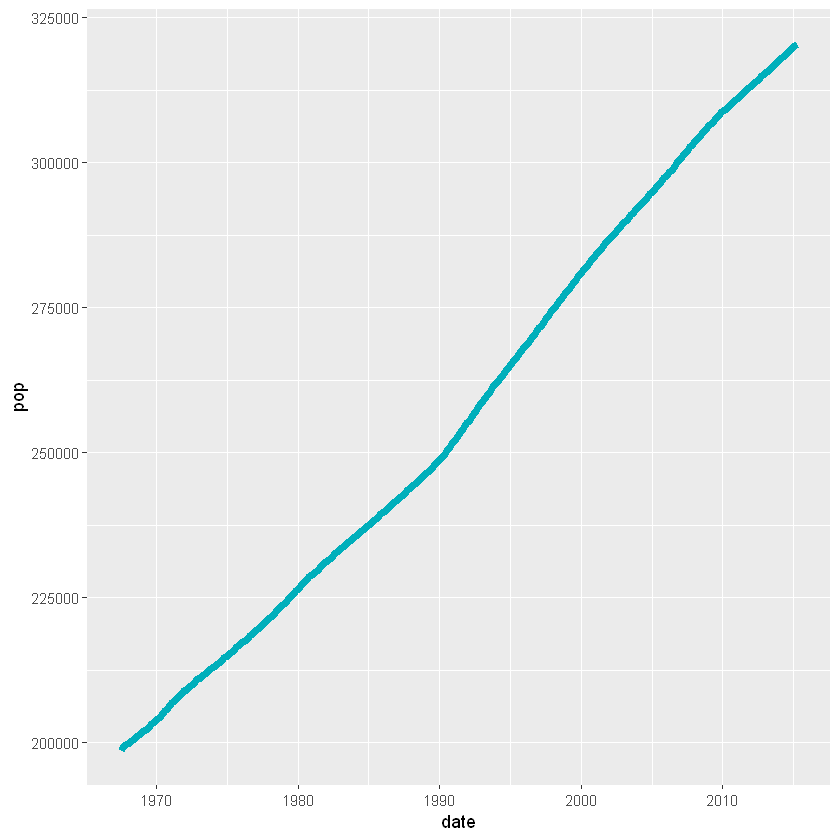

In [57]:
# Basic line plot
ggplot(data = economics, aes(x = date, y = pop))+
geom_line(color = "#00AFBB", size = 2)

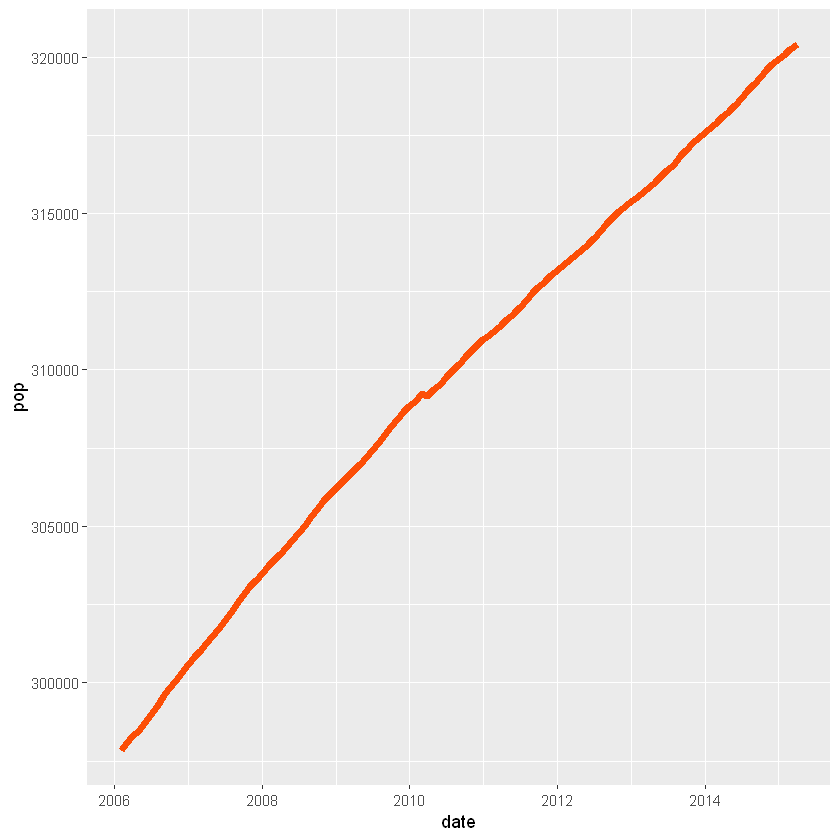

In [58]:
# Plot a subset of the data
subset = subset(economics, date > as.Date("2006-1-1"))
ggplot(data = subset, aes(x = date, y = pop)) + geom_line(color = "#FC4E07", size = 2)

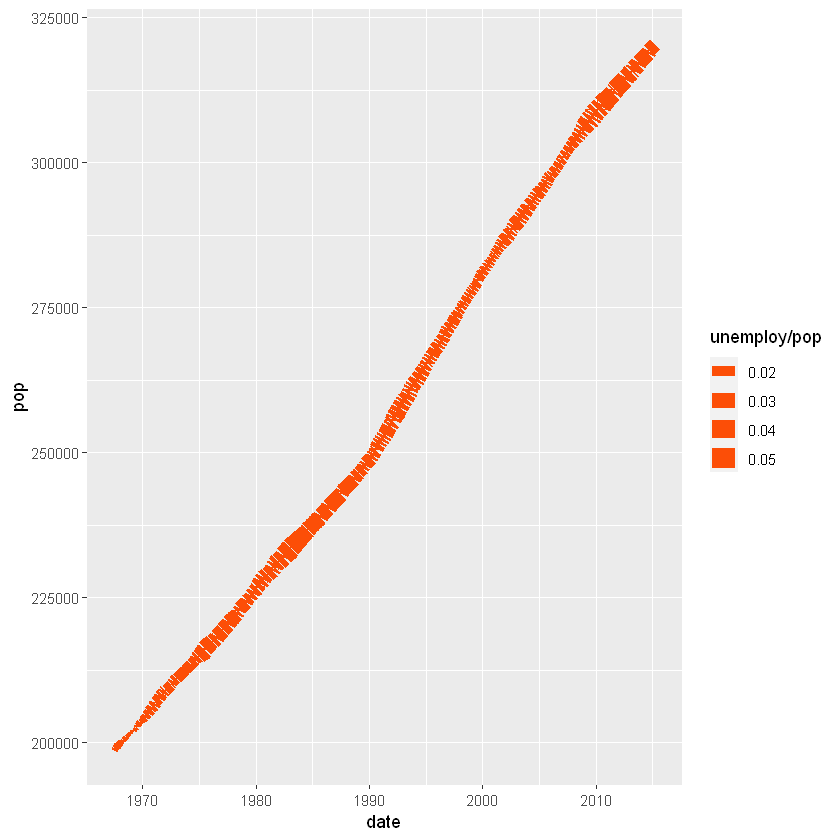

In [59]:
# Change line width
ggplot(data = economics, aes(x = date, y = pop)) +
geom_line(aes(size = unemploy/pop), color = "#FC4E07")

### Multiple Time Series plot

In [60]:
library(tidyr)
library(dplyr)
df = economics %>% select(date, psavert, uempmed) %>% gather(key = "variable", value = "value", -date)
head(df, 3)


Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract




date,variable,value
<date>,<chr>,<dbl>
1967-07-01,psavert,12.6
1967-08-01,psavert,12.6
1967-09-01,psavert,11.9


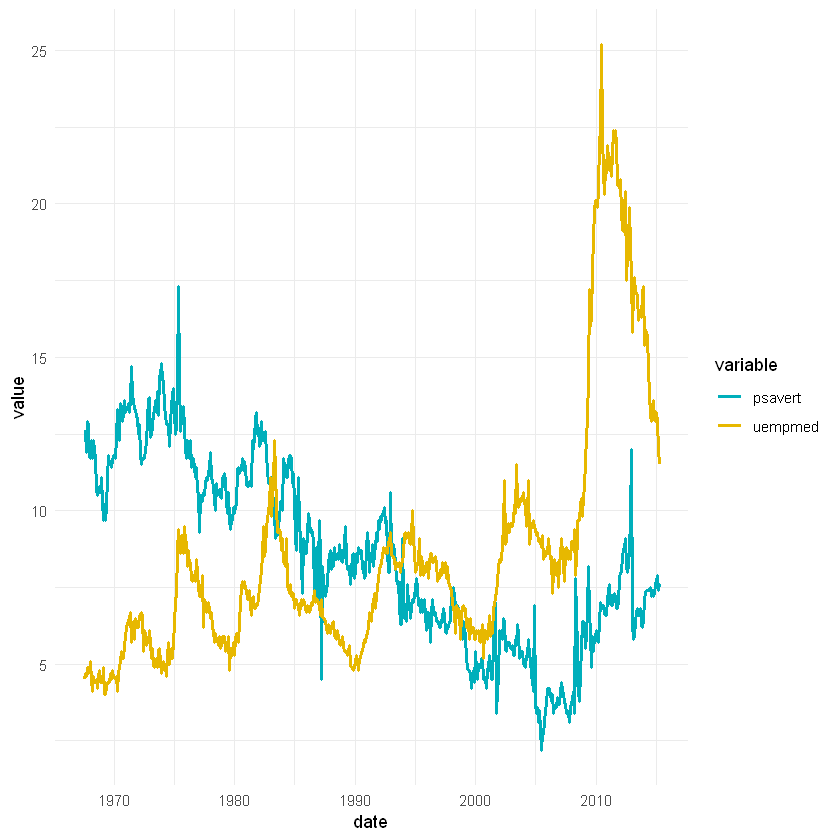

In [61]:
# Multiple line plot

ggplot(df, aes(x = date, y = value)) +
geom_line(aes(color = variable), size = 1) +
scale_color_manual(values = c("#00AFBB", "#E7B800")) +
theme_minimal()

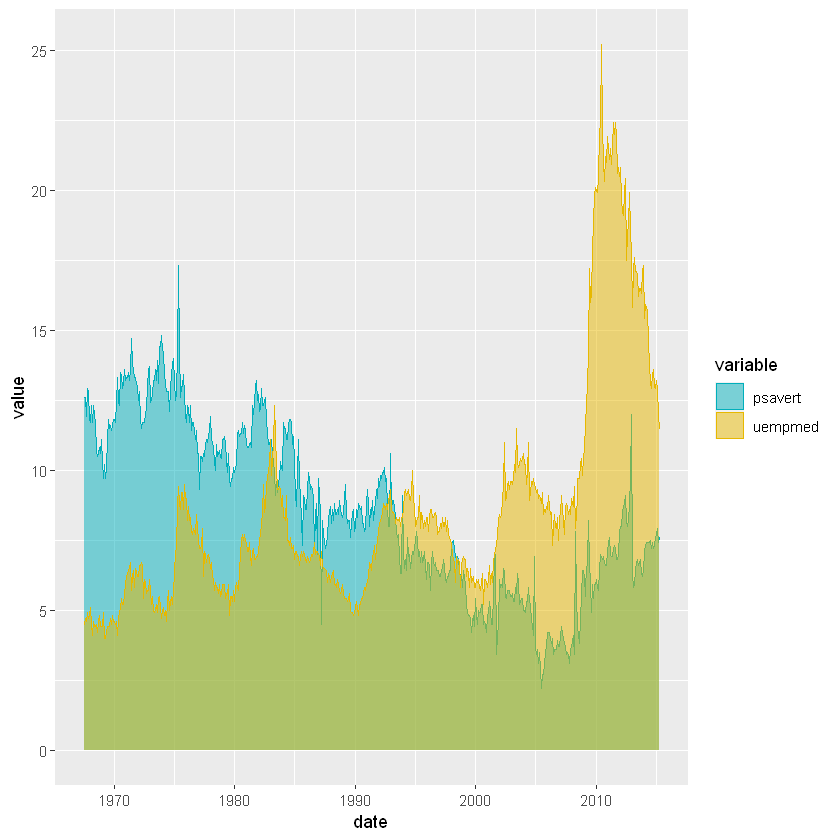

In [62]:
# Area plot

ggplot(df, aes(x = date, y = value)) +
geom_area(aes(color = variable, fill = variable), alpha = 0.5, position = position_dodge(0.8)) +
scale_color_manual(values = c("#00AFBB", "#E7B800")) +
scale_fill_manual(values = c("#00AFBB", "#E7B800"))

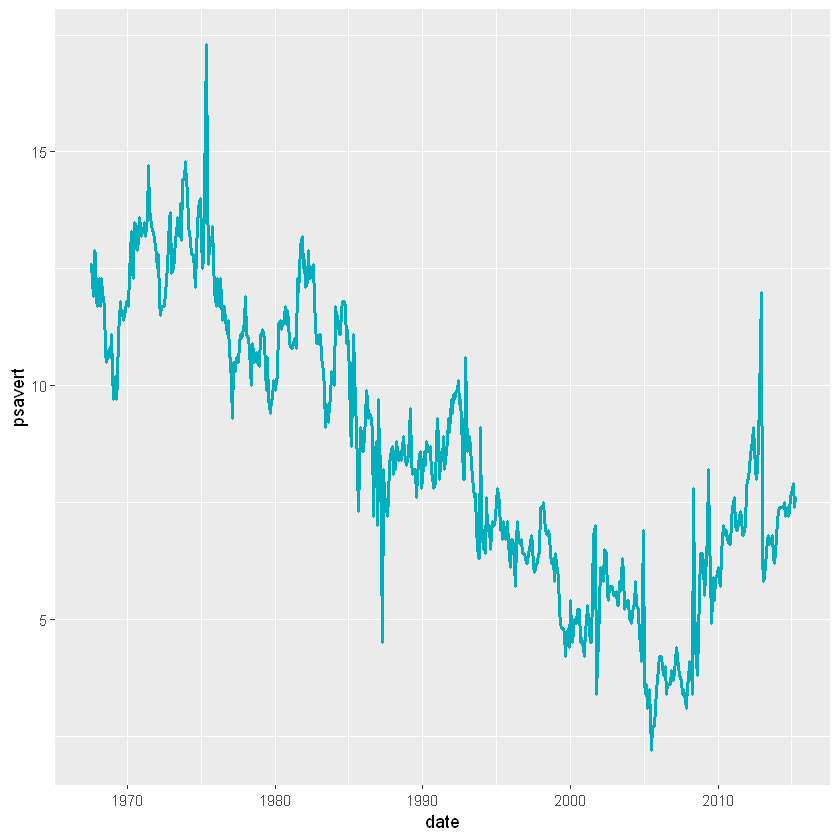

In [63]:
# Base plot with date axis
(p = ggplot(data = economics, aes(x = date, y = psavert)) +
geom_line(color = "#00AFBB", size = 1))

Warning message:
"Removed 414 row(s) containing missing values (geom_path)."


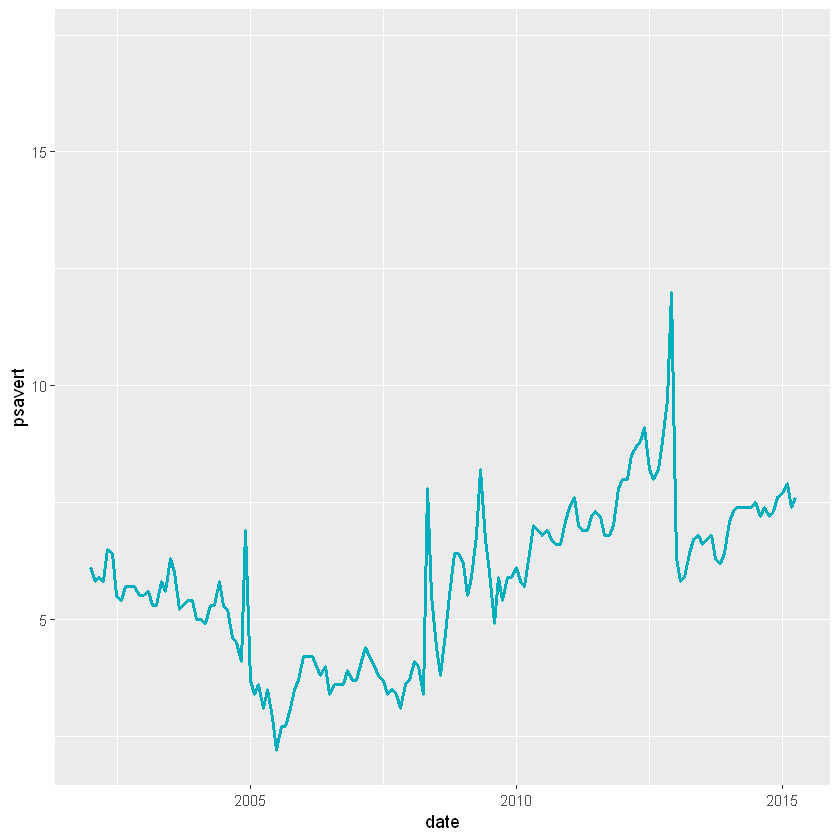

In [64]:
# Set axis limits c(min, max)
min = as.Date("2002-1-1")
max = NA
p + scale_x_date(limits = c(min, max))

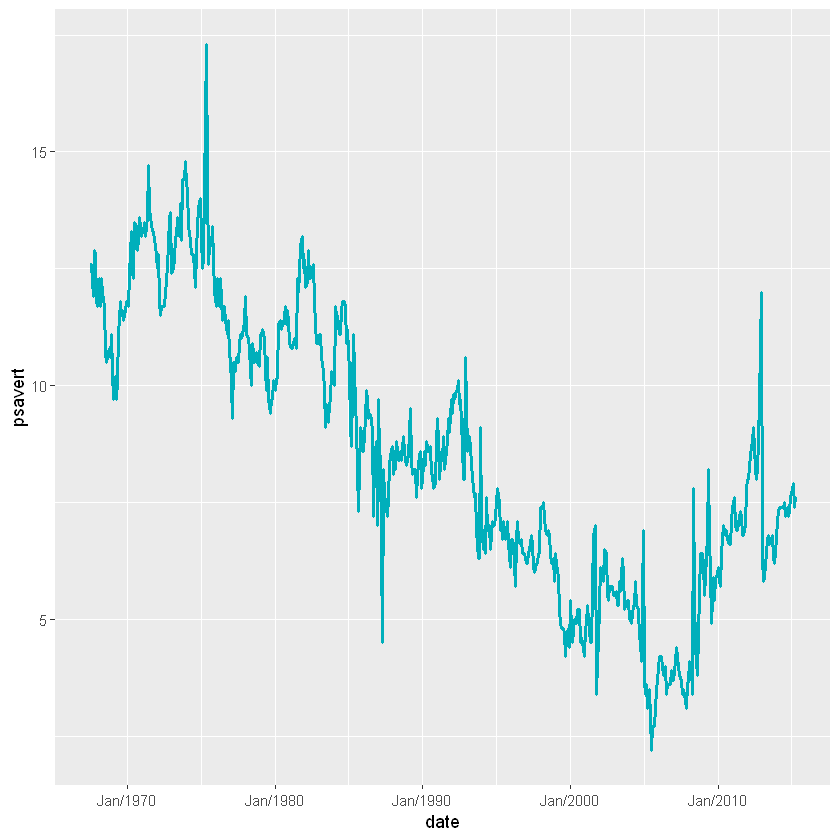

In [65]:
# Format : month/year
p + scale_x_date(date_labels = "%b/%Y")

`geom_smooth()` using formula 'y ~ x'



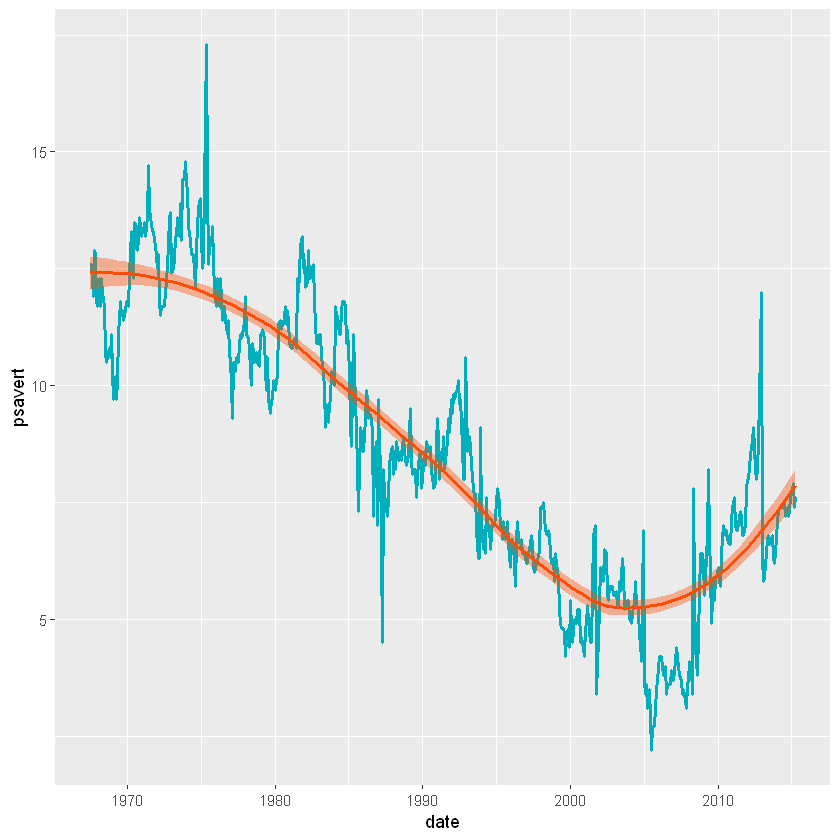

In [66]:
# Add trend smoothed line
p + stat_smooth( color = "#FC4E07", fill = "#FC4E07", method = "loess" )

## 4. ggfortify- ggpmisc

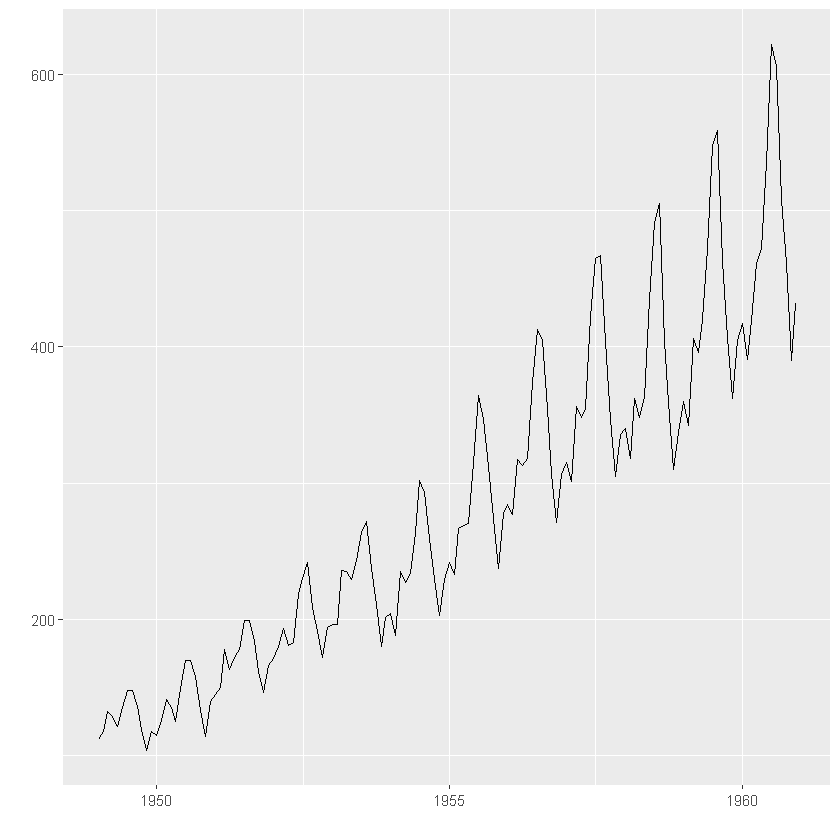

In [67]:
library(ggfortify)
library(magrittr) # for piping %>%
# Plot ts objects
autoplot(AirPassengers)

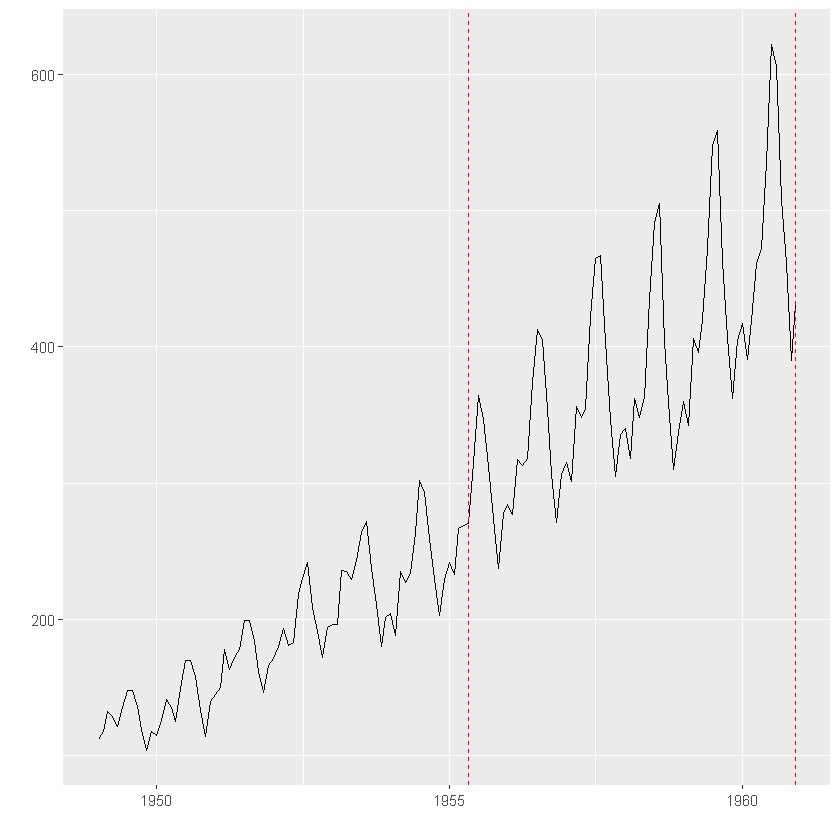

In [68]:
# Identify change points in mean and variance
AirPassengers %>% changepoint:: cpt.meanvar() %>% # Identify change points
autoplot()

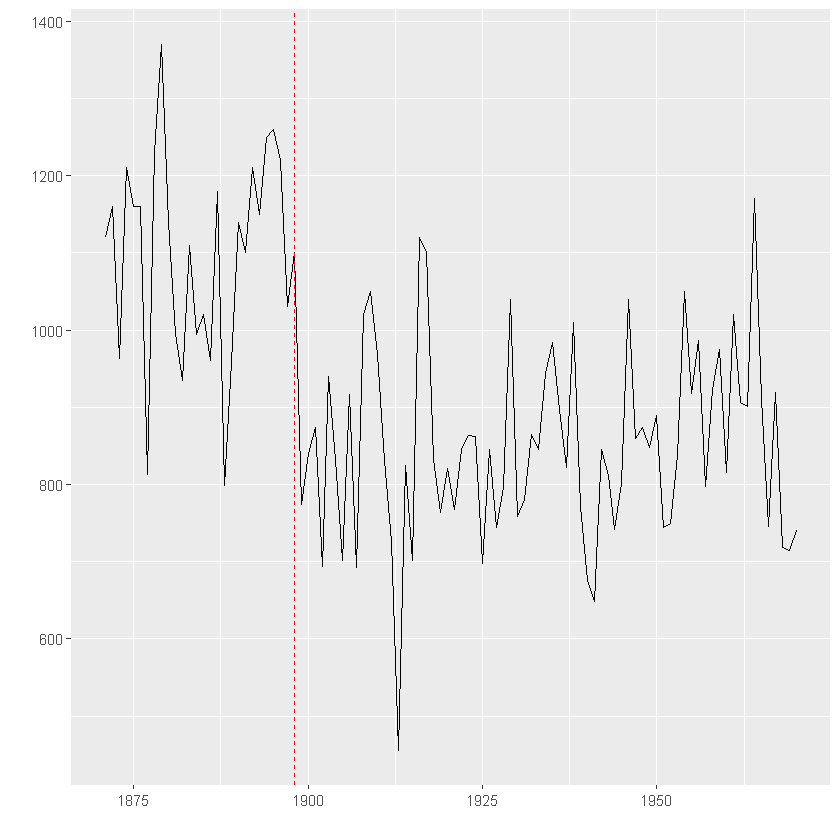

In [69]:
# Detect jump in a data
strucchange::breakpoints(Nile ~ 1) %>% autoplot()

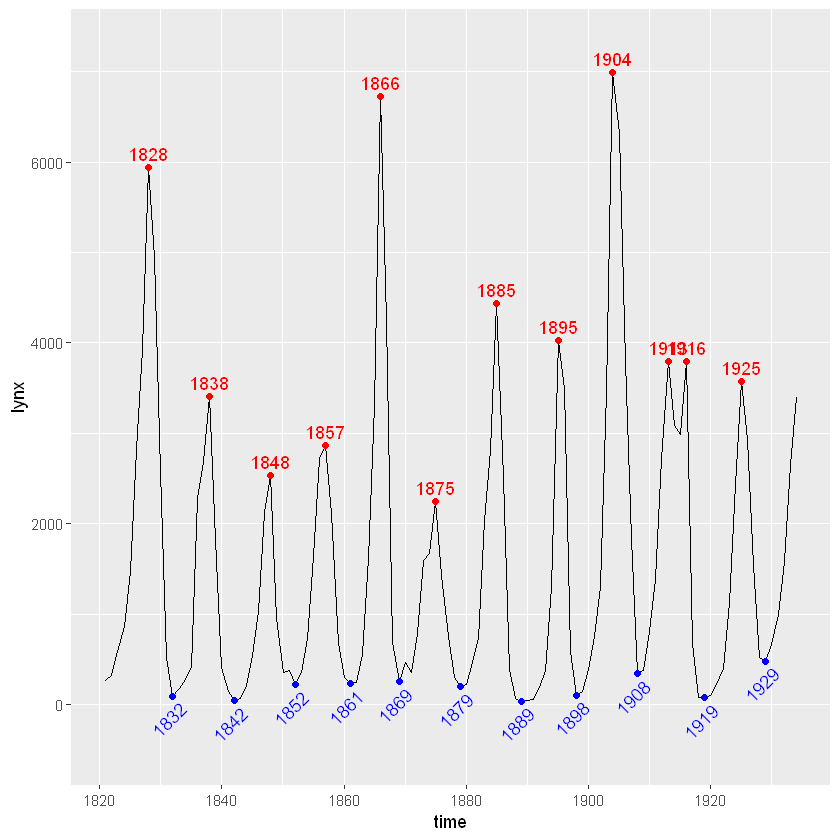

In [70]:
# Detect peaks and valleys:
library(ggpmisc)
ggplot(lynx, as.numeric = FALSE) + geom_line() +
stat_peaks(colour = "red") +
stat_peaks(geom = "text", colour = "red", vjust = -0.5, x.label.fmt = "%Y") +
stat_valleys(colour = "blue") +
stat_valleys(geom = "text", colour = "blue", angle = 45, vjust = 1.5, hjust = 1, x.label.fmt = "%Y") +
ylim(-500, 7300)